In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.io as po

# 한글 폰트 설정
import platform
plt.rc('font', family='Malgun Gothic')
# 마이너스 폰트 설정
plt.rc('axes', unicode_minus=False) 
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

""" # Warning 제거
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
warnings.simplefilter(action='ignore', category=UserWarning)  
pd.set_option('mode.chained_assignment',  None)   
#pd.set_option('mode.chained_assignment', 'warn') """

" # Warning 제거\nimport warnings\nwarnings.simplefilter(action='ignore', category=FutureWarning) \nwarnings.simplefilter(action='ignore', category=UserWarning)  \npd.set_option('mode.chained_assignment',  None)   \n#pd.set_option('mode.chained_assignment', 'warn') "

In [3]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [4]:
train = pd.read_csv(r'data\train.csv')
test = pd.read_csv(r'data\test.csv')
aaa = pd.read_csv(r'data\sample_submission.csv')

In [9]:
y_train = train['착과량(int)']
X_train = train.drop(['ID', '착과량(int)'],axis=1)

X_test = test.drop('ID', axis = 1)

In [5]:
categorical_features = ['ID','착과량(int)']
numerical_features = [i for i in train.columns if i not in categorical_features]
train_corr = train.drop(train[categorical_features], axis=1)

train_corr['착과량(int)'] = train['착과량(int)']
# Y_LABEL을 object형에서 int형으로 변환
train_corr = train_corr.astype({'착과량(int)' : 'int'})
corr = train_corr.corr(method='pearson')

correlation = corr.unstack()
train_temp = pd.DataFrame(abs(correlation['착과량(int)']).sort_values(ascending=False), columns=['착과량(int)'])
train_temp.style.background_gradient(cmap='viridis')

In [12]:
from flaml import AutoML

MODEL_TIME_BUDGET = 60*5
MODEL_METRIC = 'mae'
MODEL_TASK = "regression"

auto_model = AutoML()
params = {
    "time_budget": MODEL_TIME_BUDGET,
    "metric": MODEL_METRIC,
    "task": MODEL_TASK,
    "seed": 42
}
auto_model.fit(X_train, y_train, **params)

[flaml.automl: 12-18 22:45:38] {2599} INFO - task = regression
[flaml.automl: 12-18 22:45:38] {2601} INFO - Data split method: uniform
[flaml.automl: 12-18 22:45:38] {2604} INFO - Evaluation method: cv
[flaml.automl: 12-18 22:45:38] {2726} INFO - Minimizing error metric: mae
[flaml.automl: 12-18 22:45:38] {2870} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 12-18 22:45:38] {3166} INFO - iteration 0, current learner lgbm
[flaml.automl: 12-18 22:45:38] {3296} INFO - Estimated sufficient time budget=1559s. Estimated necessary time budget=11s.
[flaml.automl: 12-18 22:45:38] {3343} INFO -  at 0.4s,	estimator lgbm's best error=128.1663,	best estimator lgbm's best error=128.1663
[flaml.automl: 12-18 22:45:38] {3166} INFO - iteration 1, current learner lgbm
[flaml.automl: 12-18 22:45:38] {3343} INFO -  at 0.6s,	estimator lgbm's best error=128.1663,	best estimator lgbm's best error=128.1663
[flaml.automl: 12-18 22:45:38] {3166

In [13]:
print('Best hyperparmeter:', auto_model.model.estimator)
print('Best hyperparmeter config:', auto_model.best_config)

Best hyperparmeter: RandomForestRegressor(max_features=0.716046067574096, max_leaf_nodes=19,
                      n_estimators=8, n_jobs=-1)
Best hyperparmeter config: {'n_estimators': 8, 'max_features': 0.716046067574096, 'max_leaves': 19}


In [4]:
새순 = [i for i in list(train.columns) if '새순' in i]

In [5]:
새순

['2022-09-01 새순',
 '2022-09-02 새순',
 '2022-09-03 새순',
 '2022-09-04 새순',
 '2022-09-05 새순',
 '2022-09-06 새순',
 '2022-09-07 새순',
 '2022-09-08 새순',
 '2022-09-09 새순',
 '2022-09-10 새순',
 '2022-09-11 새순',
 '2022-09-12 새순',
 '2022-09-13 새순',
 '2022-09-14 새순',
 '2022-09-15 새순',
 '2022-09-16 새순',
 '2022-09-17 새순',
 '2022-09-18 새순',
 '2022-09-19 새순',
 '2022-09-20 새순',
 '2022-09-21 새순',
 '2022-09-22 새순',
 '2022-09-23 새순',
 '2022-09-24 새순',
 '2022-09-25 새순',
 '2022-09-26 새순',
 '2022-09-27 새순',
 '2022-09-28 새순',
 '2022-09-29 새순',
 '2022-09-30 새순',
 '2022-10-01 새순',
 '2022-10-02 새순',
 '2022-10-03 새순',
 '2022-10-04 새순',
 '2022-10-05 새순',
 '2022-10-06 새순',
 '2022-10-07 새순',
 '2022-10-08 새순',
 '2022-10-09 새순',
 '2022-10-10 새순',
 '2022-10-11 새순',
 '2022-10-12 새순',
 '2022-10-13 새순',
 '2022-10-14 새순',
 '2022-10-15 새순',
 '2022-10-16 새순',
 '2022-10-17 새순',
 '2022-10-18 새순',
 '2022-10-19 새순',
 '2022-10-20 새순',
 '2022-10-21 새순',
 '2022-10-22 새순',
 '2022-10-23 새순',
 '2022-10-24 새순',
 '2022-10-25 새순',
 '2022-10-

In [8]:
train.filter(regex="새순").filter(regex="2022-09-0")

2022-09-01 새순  2022-09-02 새순  2022-09-03 새순  2022-09-04 새순  \
0               2.8            2.8            2.7            2.7   
1               3.3            3.3            3.3            3.2   
2               3.0            2.9            2.9            2.9   
3               3.1            3.0            3.0            3.0   
4               3.7            3.6            3.6            3.6   
...             ...            ...            ...            ...   
2202            4.7            4.6            4.5            4.5   
2203            3.1            3.0            3.0            3.0   
2204            3.0            3.0            2.9            2.9   
2205            3.9            3.9            3.8            3.8   
2206            5.3            5.2            5.2            5.1   

      2022-09-05 새순  2022-09-06 새순  2022-09-07 새순  2022-09-08 새순  \
0               2.7            2.7            2.6            2.6   
1               3.2            3.1            3.1            3.1   
2               2.9            2.8            2.8            2.8   
3               3.0            2.9            2.9            2.9   
4               3.5            3.5            3.5            3.4   
...             ...            ...            ...            ...   
2202            4.4            4.4            4.3            4.3   
2203            2.9            2.9            2.9            2.9   
2204            2.9            2.9            2.8            2.8   
2205            3.8            3.7            3.7            3.6   
2206            5.0            5.0            4.9            4.9   

      2022-09-09 새순  
0               2.6  
1               3.0  
2               2.8  
3               2.8  
4               3.4  
...             ...  
2202            4.2  
2203            2.8  
2204            2.8  
2205            3.6  
2206            4.8  

[2207 rows x 9 columns]

In [3]:
새순_9월 = [i for i in 새순 if '2022-09' in i]

NameError: name '새순' is not defined

In [19]:
train.columns

Index(['ID', '착과량(int)', '수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균',
       '2022-09-01 새순', '2022-09-02 새순', '2022-09-03 새순', '2022-09-04 새순',
       ...
       '2022-11-19 엽록소', '2022-11-20 엽록소', '2022-11-21 엽록소', '2022-11-22 엽록소',
       '2022-11-23 엽록소', '2022-11-24 엽록소', '2022-11-25 엽록소', '2022-11-26 엽록소',
       '2022-11-27 엽록소', '2022-11-28 엽록소'],
      dtype='object', length=184)

In [20]:
len(train)

2207

In [21]:
sum(train.isnull().sum())

0

In [22]:
train.describe()

착과량(int)       수고(m)    수관폭1(min)    수관폭2(max)        수관폭평균  \
count  2207.000000  2207.00000  2207.000000  2207.000000  2207.000000   
mean    406.222474   243.72995   315.186226   358.824196   337.005211   
std     218.978302    35.88914    66.327994    68.862898    64.859684   
min       1.000000    95.00000    95.000000   123.000000   109.000000   
25%     221.000000   223.00000   271.500000   313.500000   294.000000   
50%     404.000000   243.00000   316.000000   364.000000   340.500000   
75%     593.500000   267.00000   361.000000   402.000000   380.000000   
max     799.000000   381.00000   559.000000   584.000000   571.500000   

       2022-09-01 새순  2022-09-02 새순  2022-09-03 새순  2022-09-04 새순  \
count    2207.000000    2207.000000    2207.000000    2207.000000   
mean        3.774807       3.736928       3.701495       3.663435   
std         0.774181       0.764067       0.754751       0.745394   
min         2.300000       2.200000       2.200000       2.200000   
25%         3.100000       3.100000       3.050000       3.000000   
50%         3.800000       3.700000       3.700000       3.700000   
75%         4.400000       4.400000       4.300000       4.300000   
max         5.300000       5.300000       5.200000       5.200000   

       2022-09-05 새순  ...  2022-11-19 엽록소  2022-11-20 엽록소  2022-11-21 엽록소  \
count    2207.000000  ...     2207.000000     2207.000000     2207.000000   
mean        3.627503  ...       68.992036       68.890661       68.791536   
std         0.733896  ...        4.124586        4.124429        4.125817   
min         2.200000  ...       54.246243       54.154888       54.143798   
25%         3.000000  ...       66.195524       66.075372       65.995234   
50%         3.600000  ...       69.048956       68.920295       68.841060   
75%         4.300000  ...       71.740281       71.615746       71.504264   
max         5.100000  ...       83.363883       83.227379       83.036103   

       2022-11-22 엽록소  2022-11-23 엽록소  2022-11-24 엽록소  2022-11-25 엽록소  \
count     2207.000000     2207.000000     2207.000000     2207.000000   
mean        68.692934       68.593709       68.493569       68.393050   
std          4.128586        4.130005        4.130072        4.131859   
min         54.028089       53.884892       53.695860       53.649032   
25%         65.906703       65.765257       65.691065       65.609606   
50%         68.731164       68.647716       68.514740       68.392436   
75%         71.390195       71.311027       71.227033       71.152030   
max         82.978876       82.842139       82.722266       82.575149   

       2022-11-26 엽록소  2022-11-27 엽록소  2022-11-28 엽록소  
count     2207.000000     2207.000000     2207.000000  
mean        68.291350       68.192009       68.093096  
std          4.134976        4.135591        4.136995  
min         53.644994       53.450069       53.379849  
25%         65.487863       65.374528       65.278624  
50%         68.292889       68.207648       68.102235  
75%         71.038257       70.947707       70.850934  
max         82.491041       82.371832       82.321938  

[8 rows x 183 columns]

# 수고(m),수관폭1(min),수관폭2(max),수관폭평균    vs   착과량(int)	

In [23]:
px.scatter(train, x='수고(m)',y='수관폭평균',color='착과량(int)')

In [24]:
train['수관폭/수고'] = train['수관폭평균'] / train['수고(m)']
px.scatter(train, x='수관폭/수고',y='착과량(int)')
train.drop(['수관폭/수고'], axis=1,inplace=True)

In [26]:
train['수관폭max/min'] = train['수관폭2(max)'] / train['수관폭1(min)']
px.scatter(train, x='수관폭max/min',y='착과량(int)')
train.drop(['수관폭max/min'], axis=1,inplace=True)

# 새순,엽록소 vs 착과량(int)

In [30]:
새순 = [i for i in list(train.columns) if '새순' in i]

<AxesSubplot:>

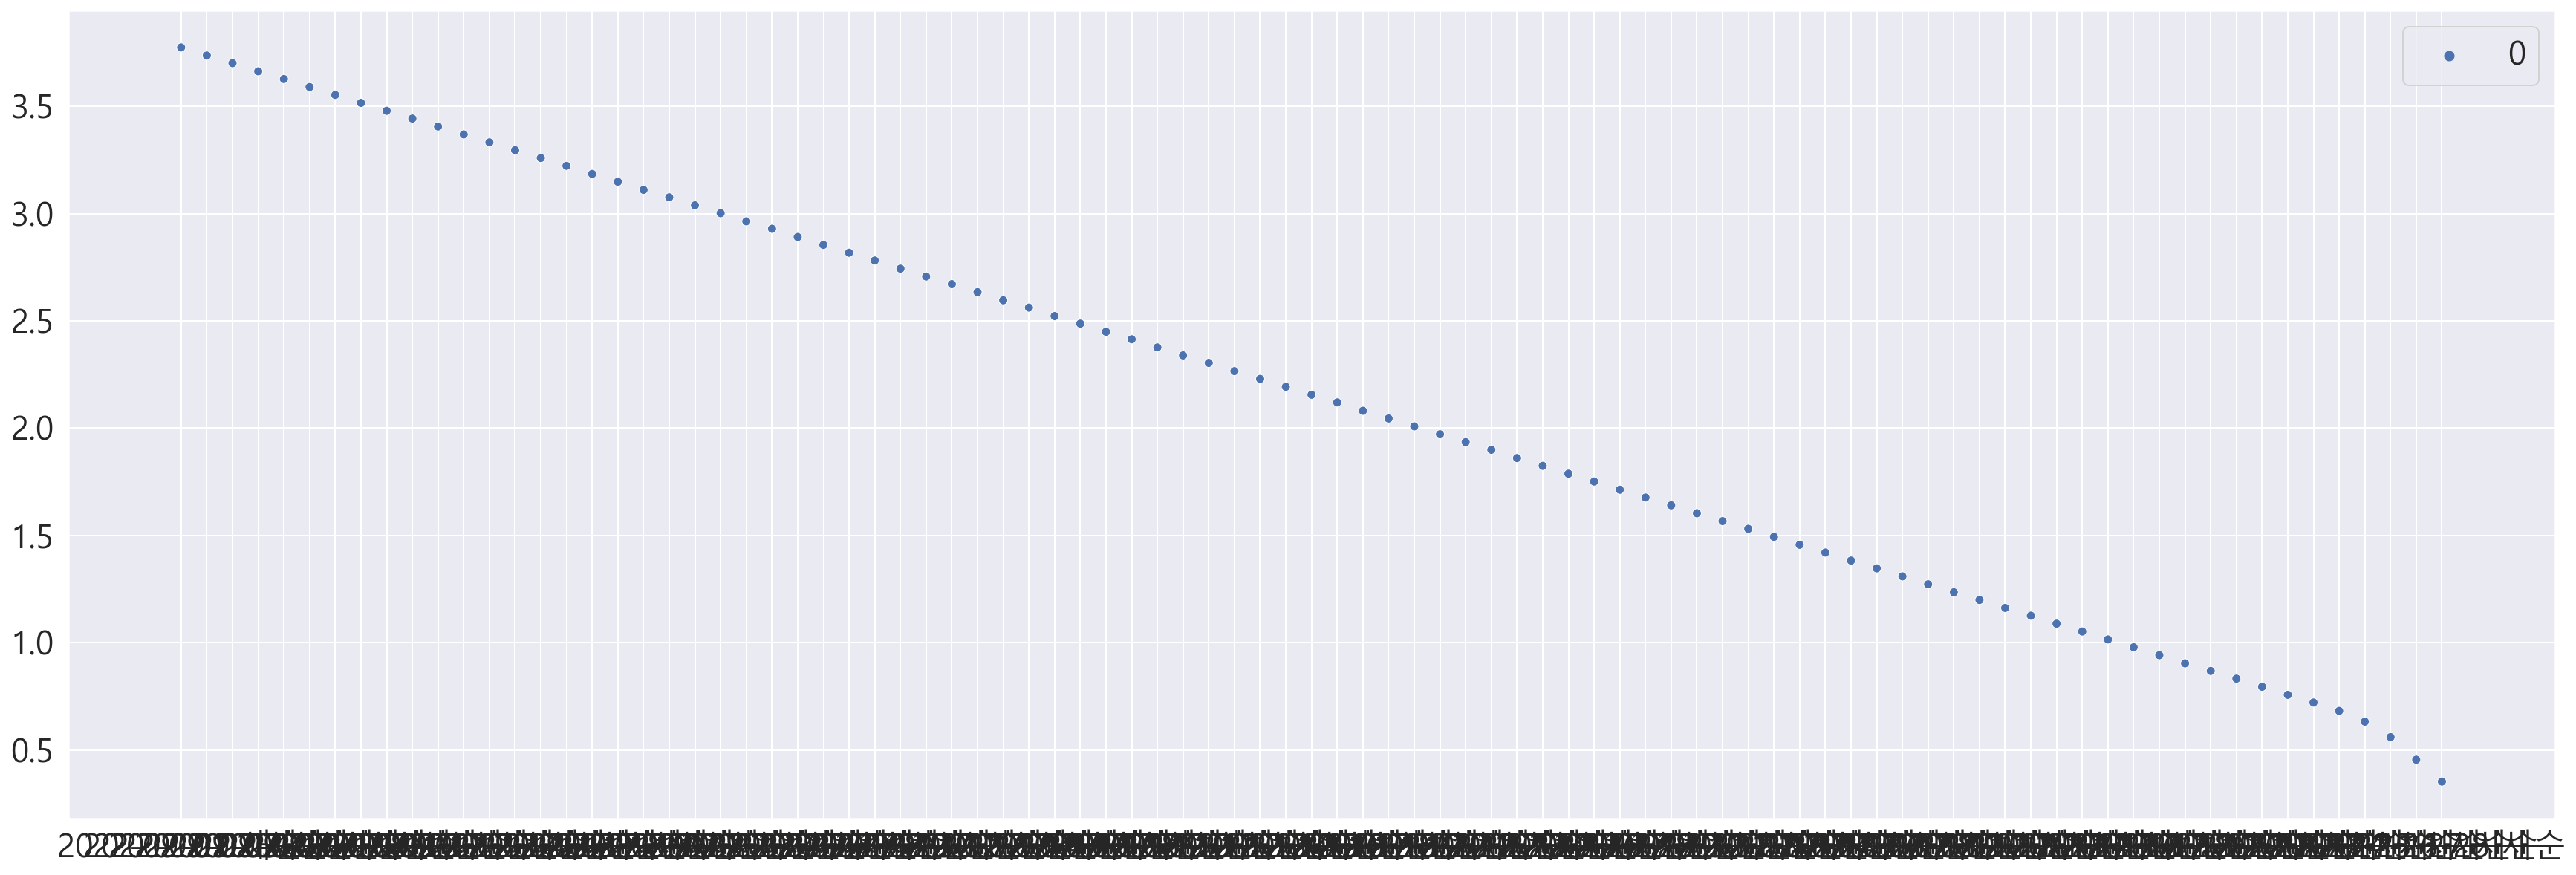

In [128]:
dict_새순평균 = {}
for i in 새순:
    dict_새순평균[i] = sum(train[i])/len(train)

df_새순평균 = pd.DataFrame(pd.Series(dict_새순평균))

plt.figure(figsize = (30, 10))
sns.scatterplot(data=df_새순평균)

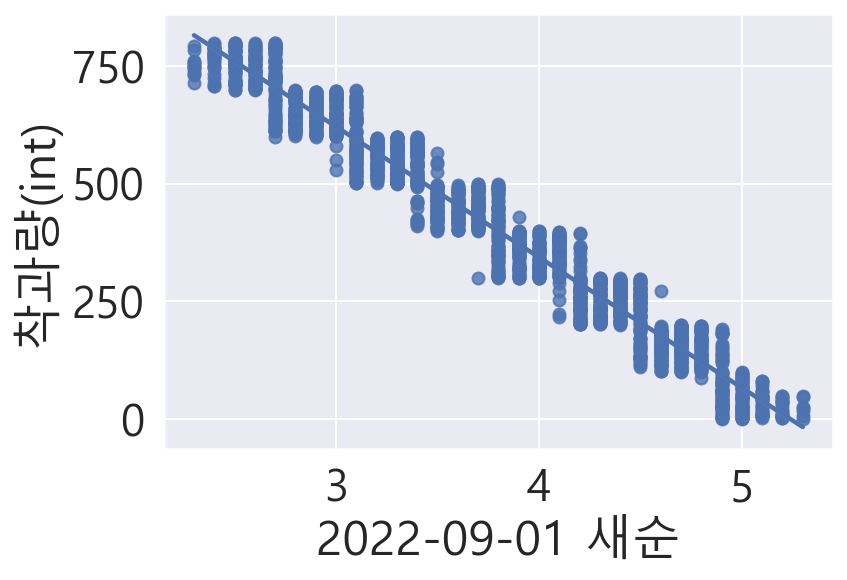

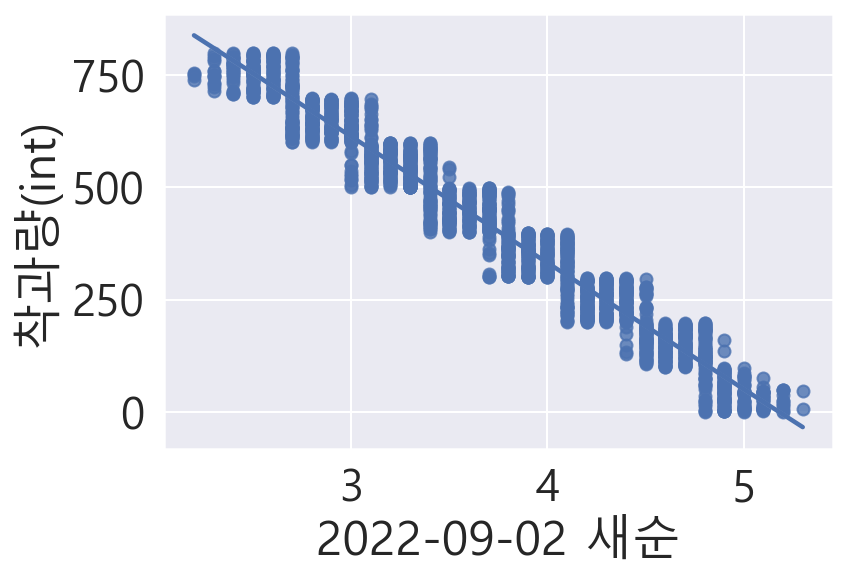

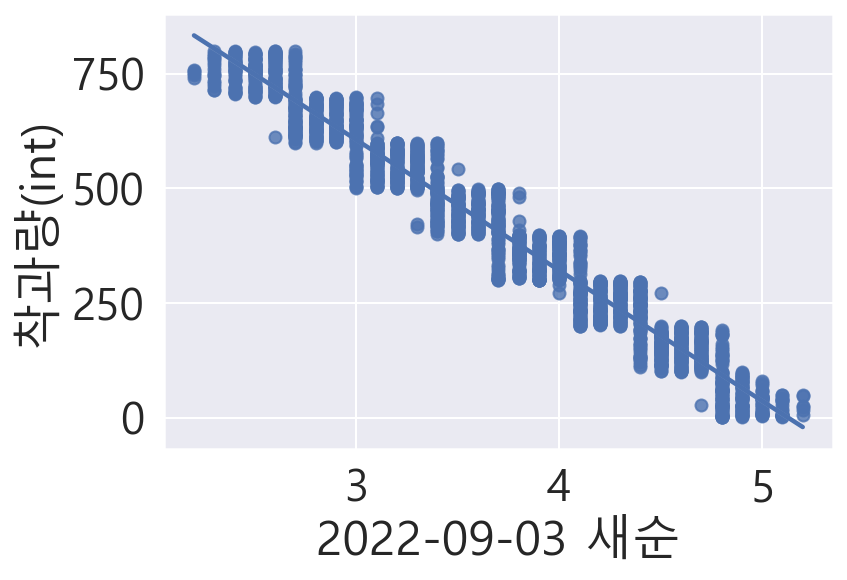

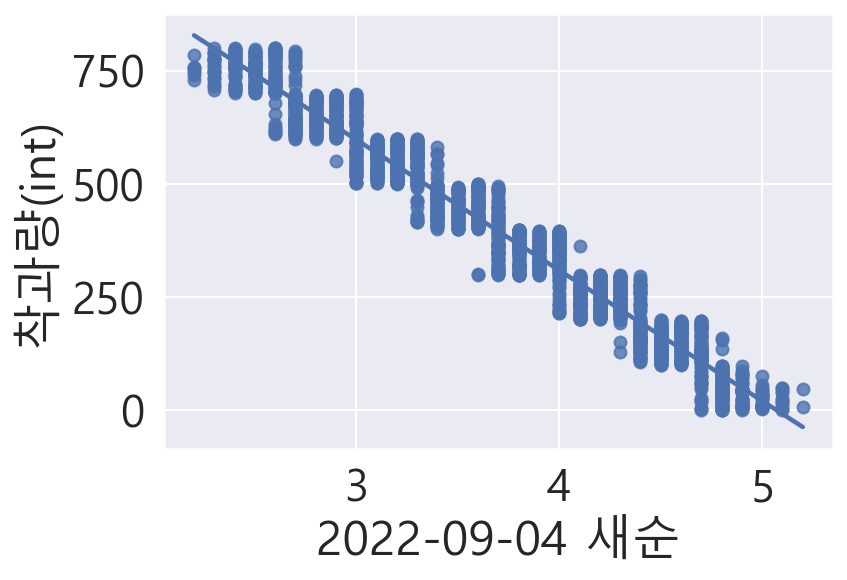

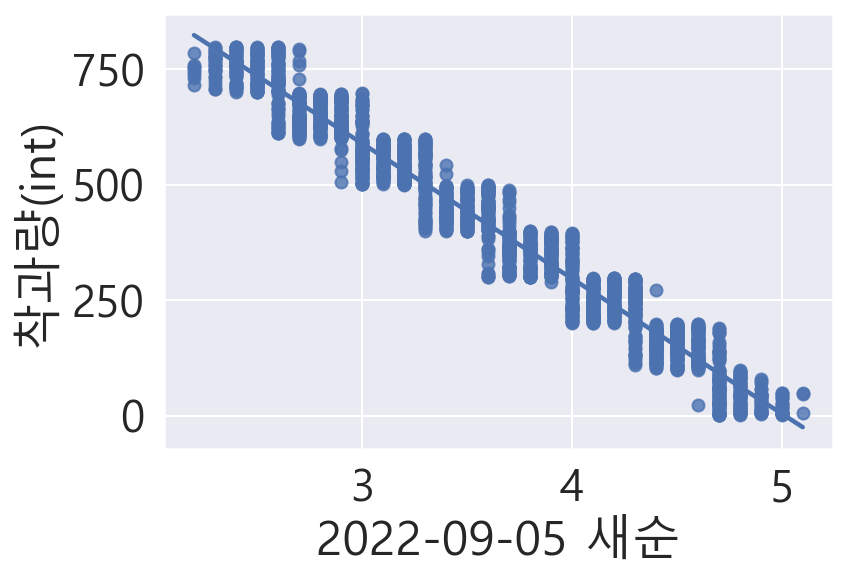

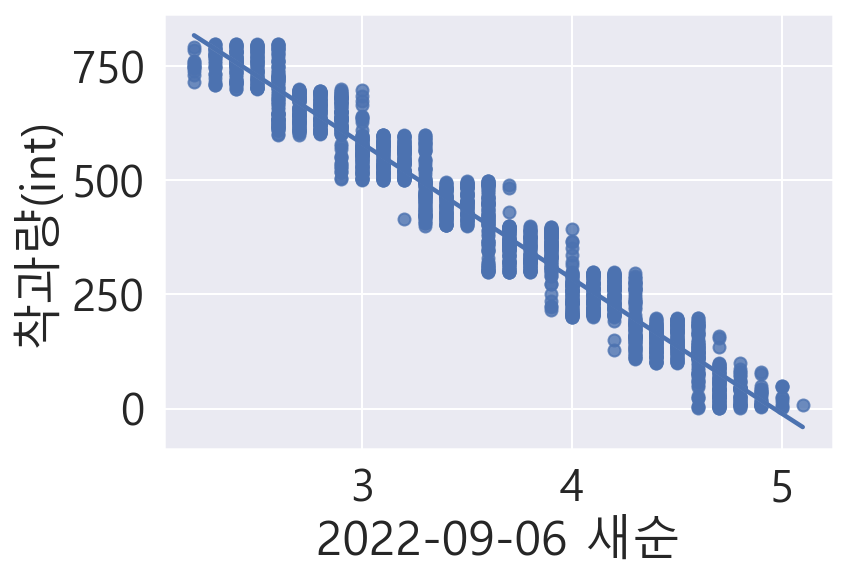

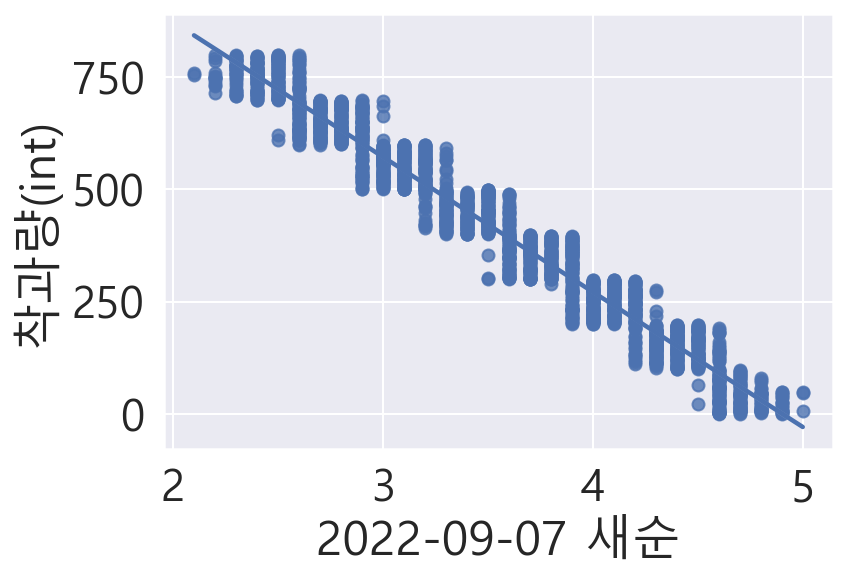

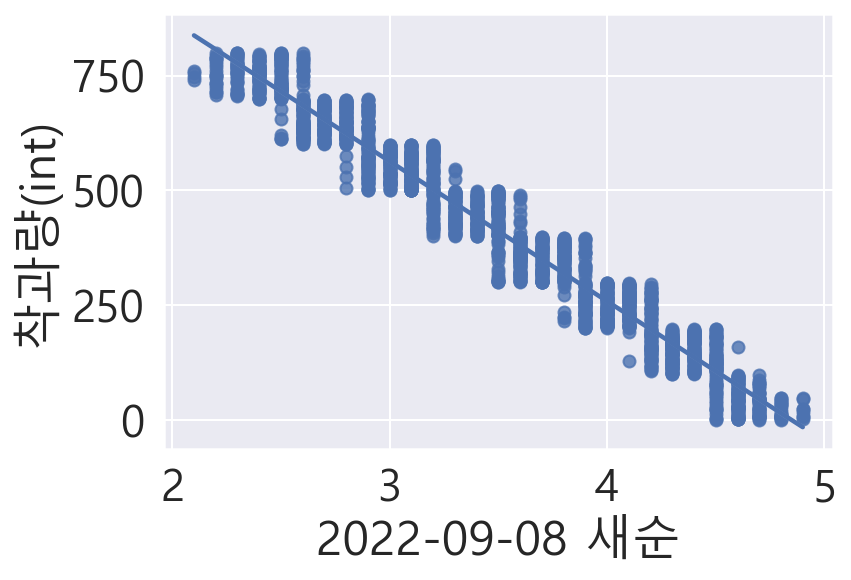

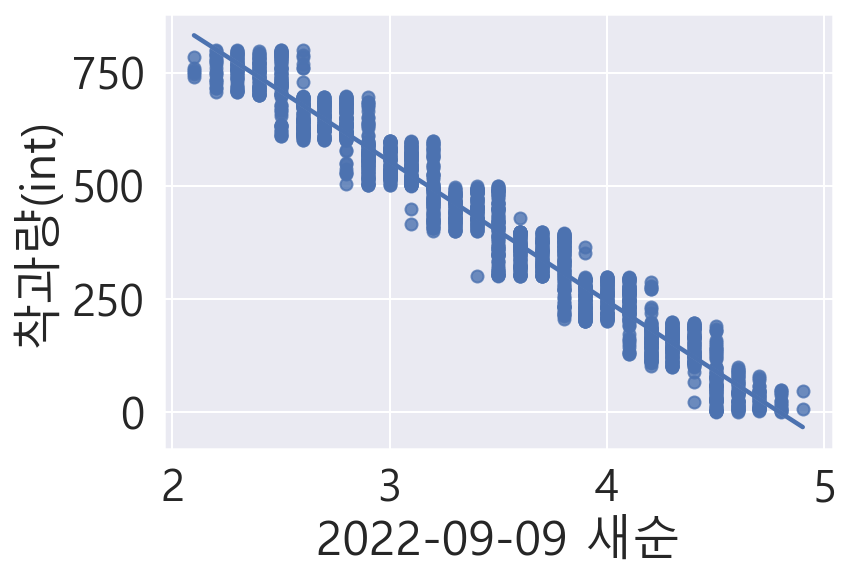

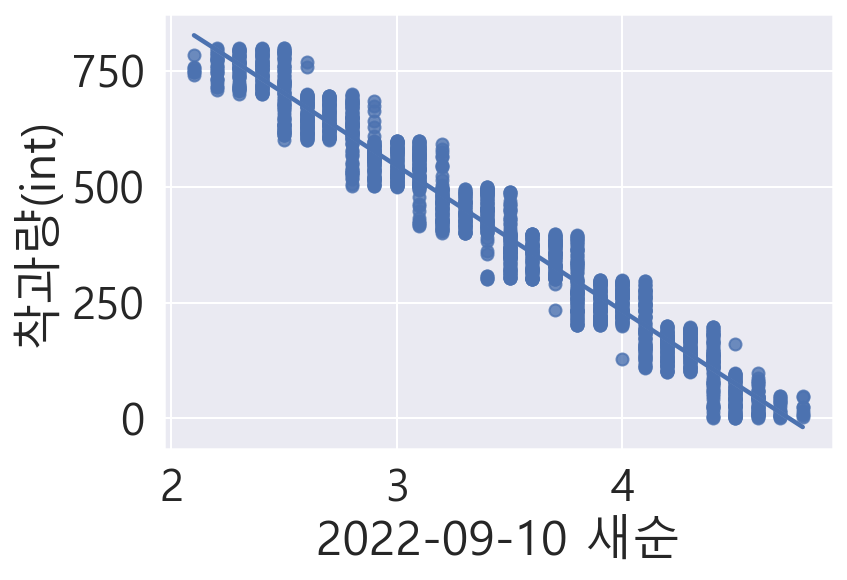

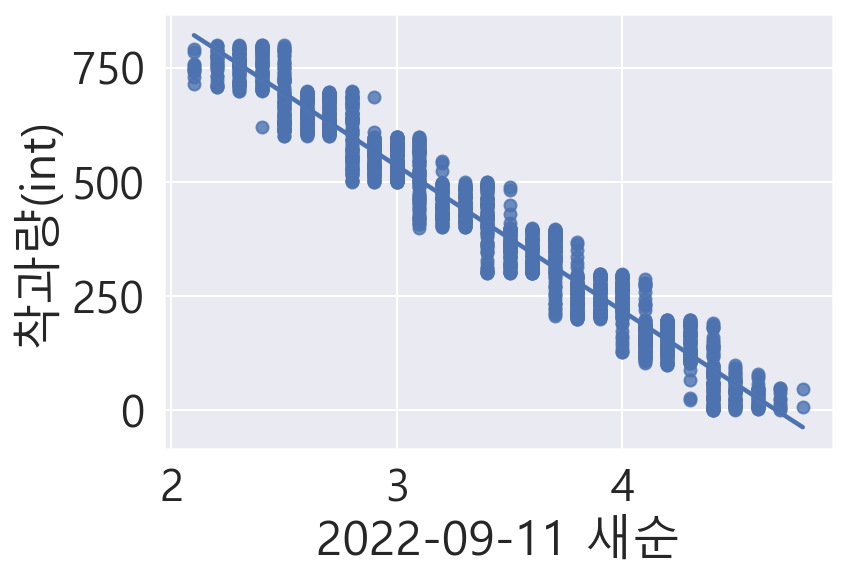

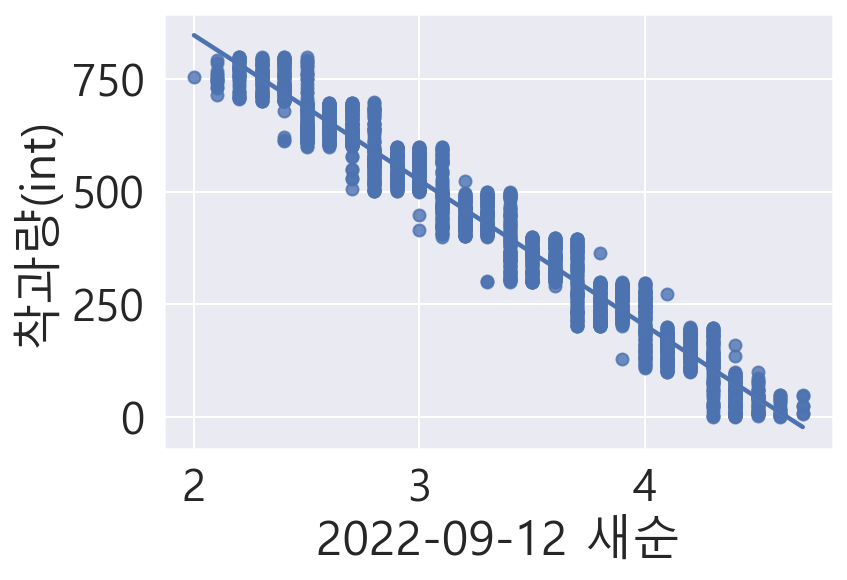

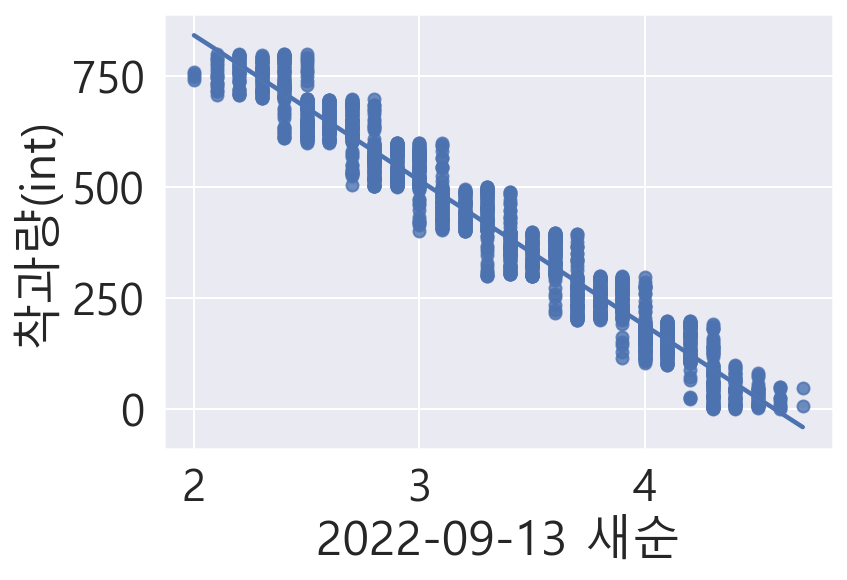

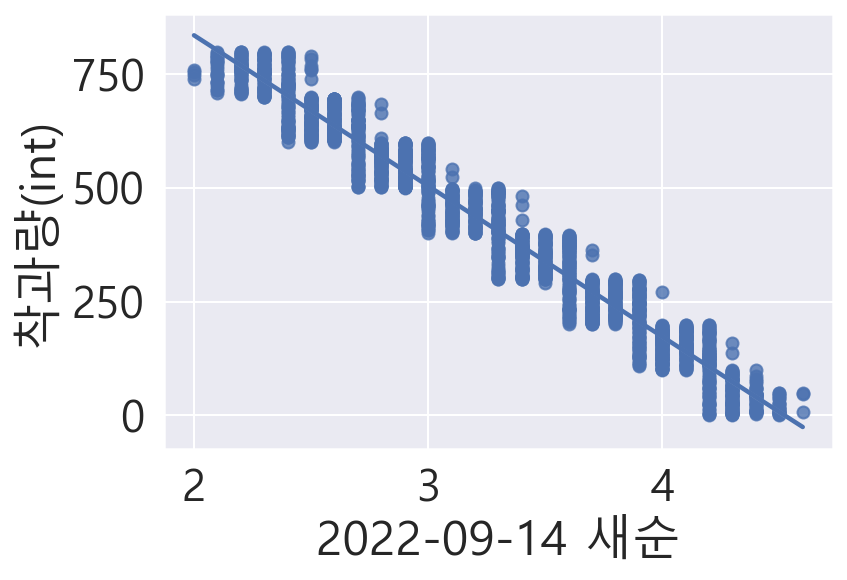

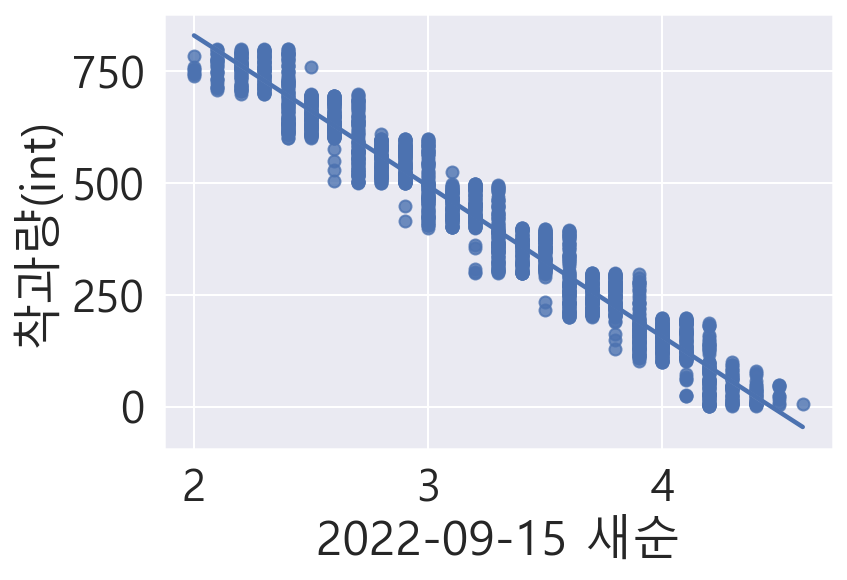

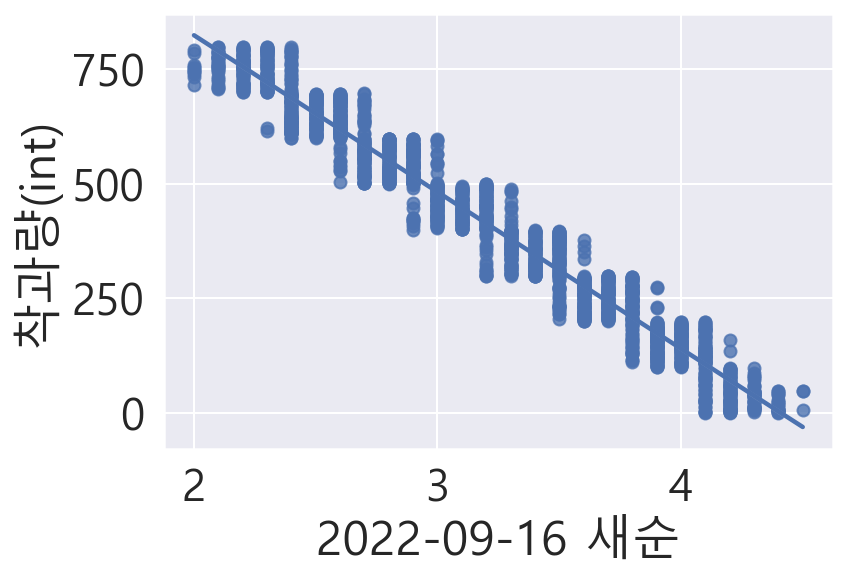

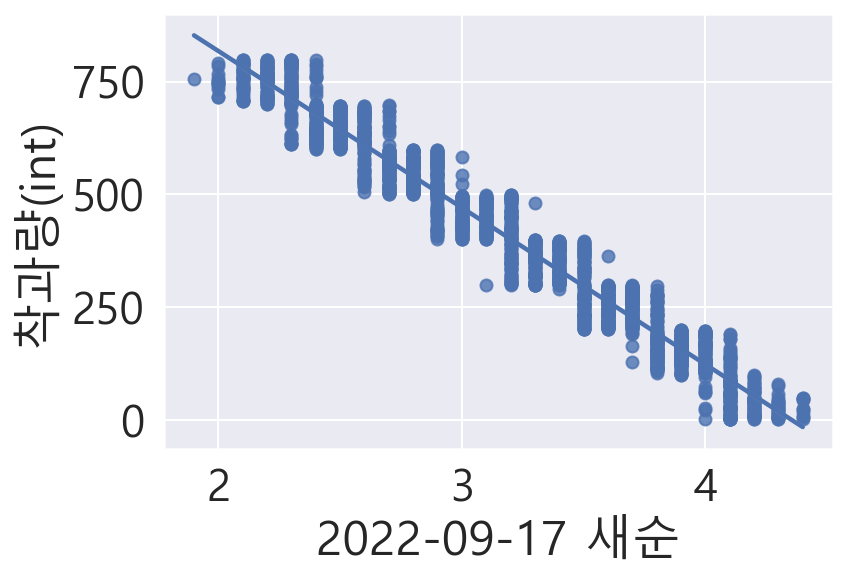

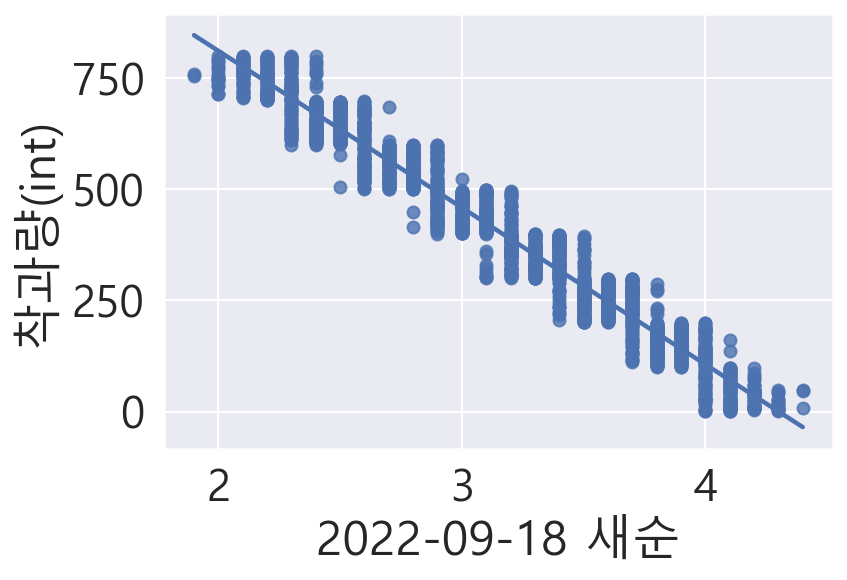

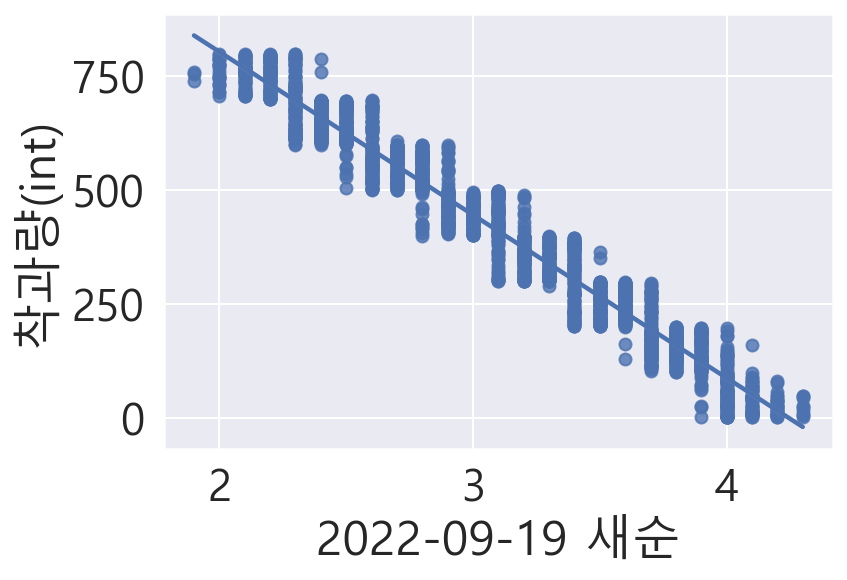

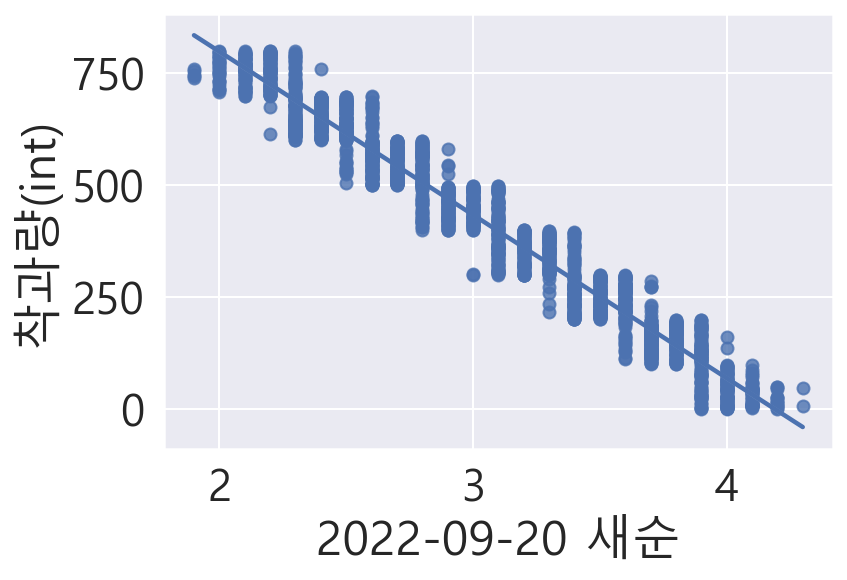

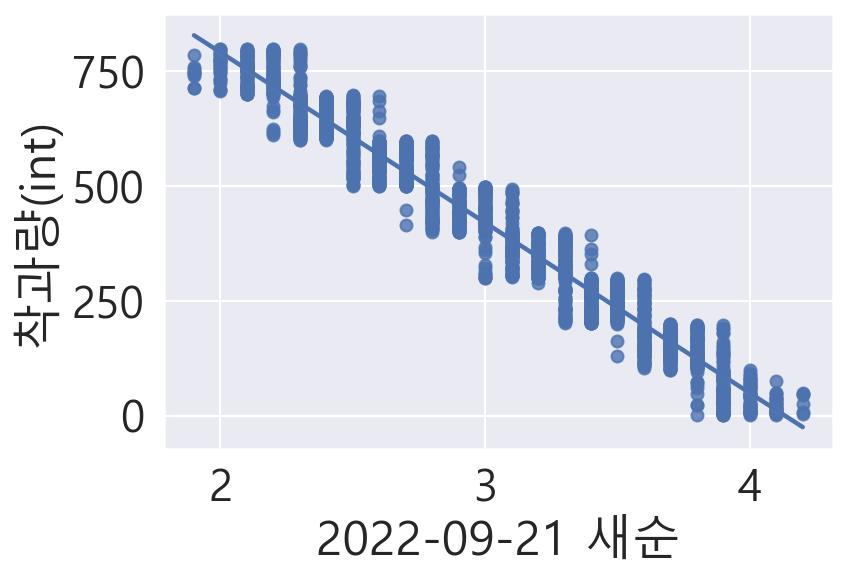

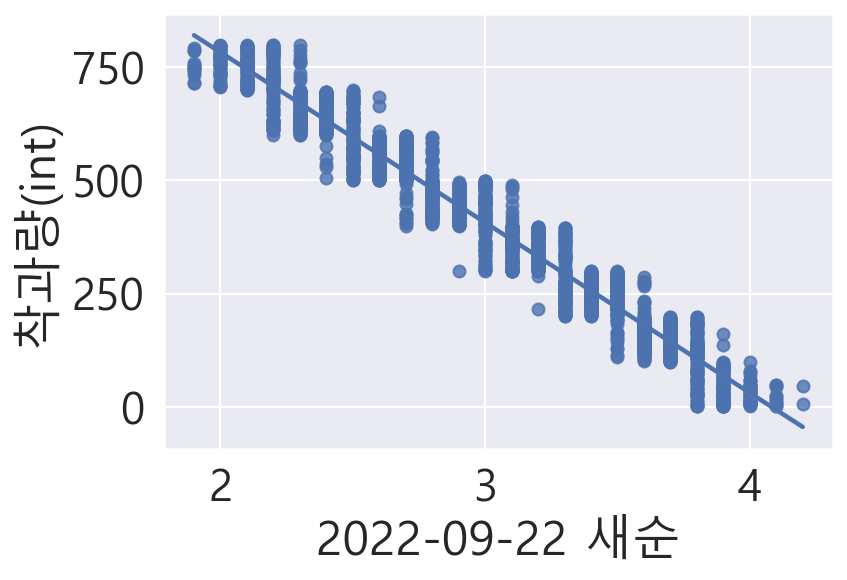

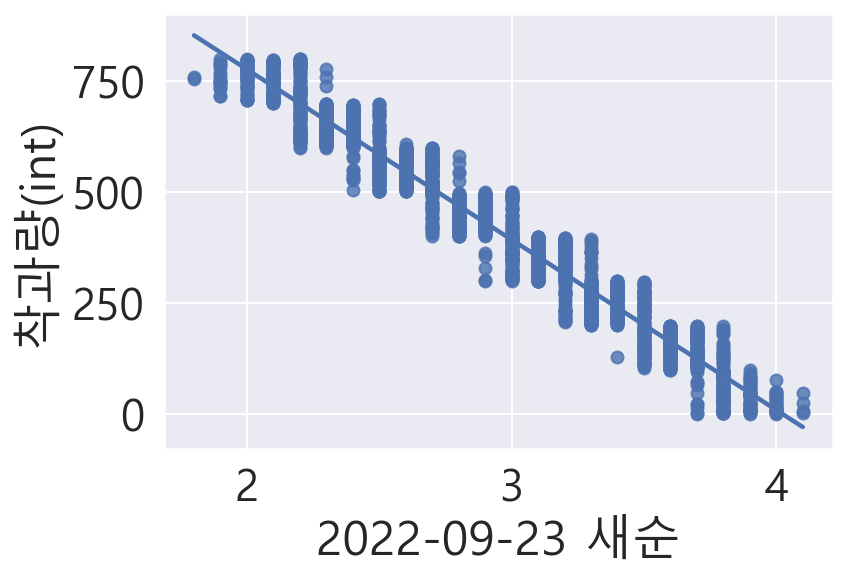

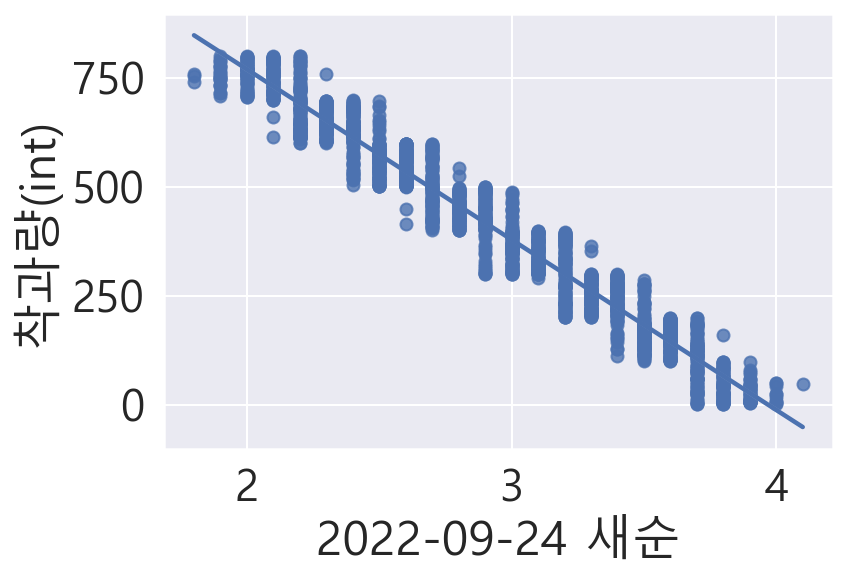

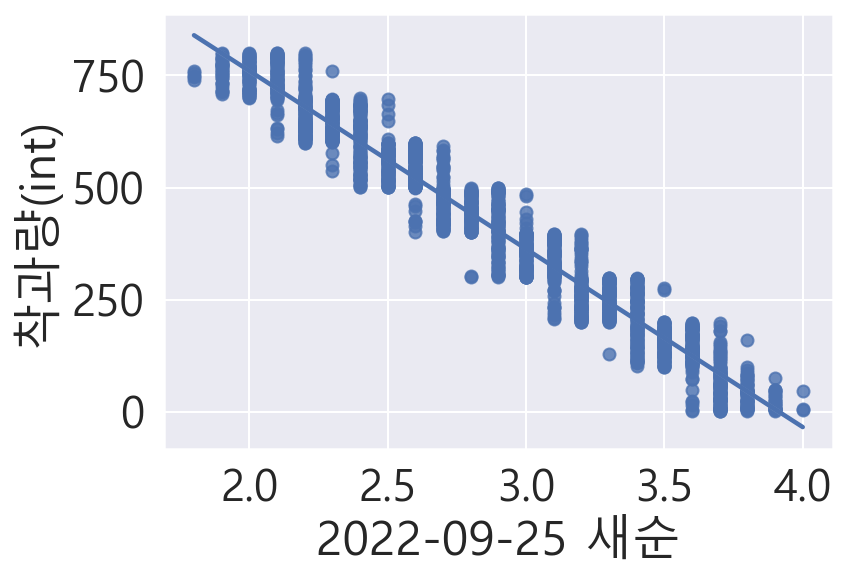

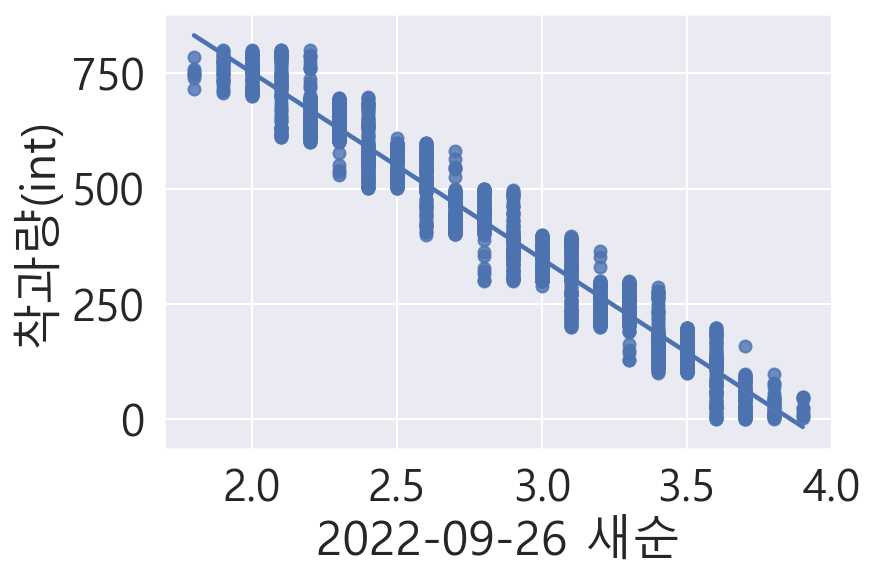

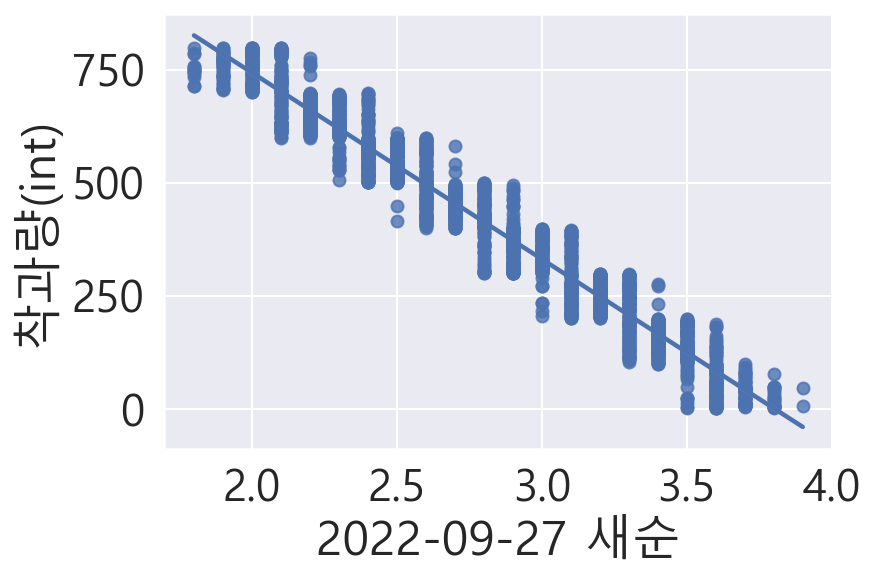

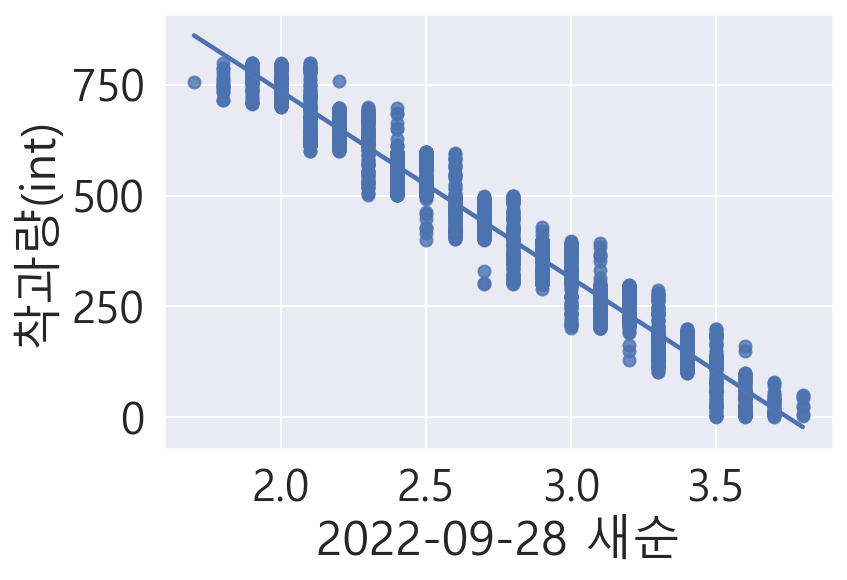

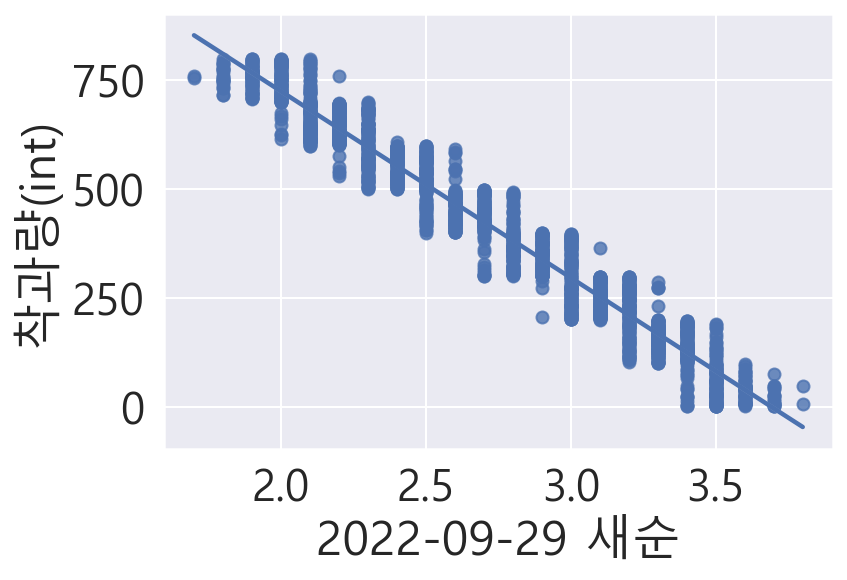

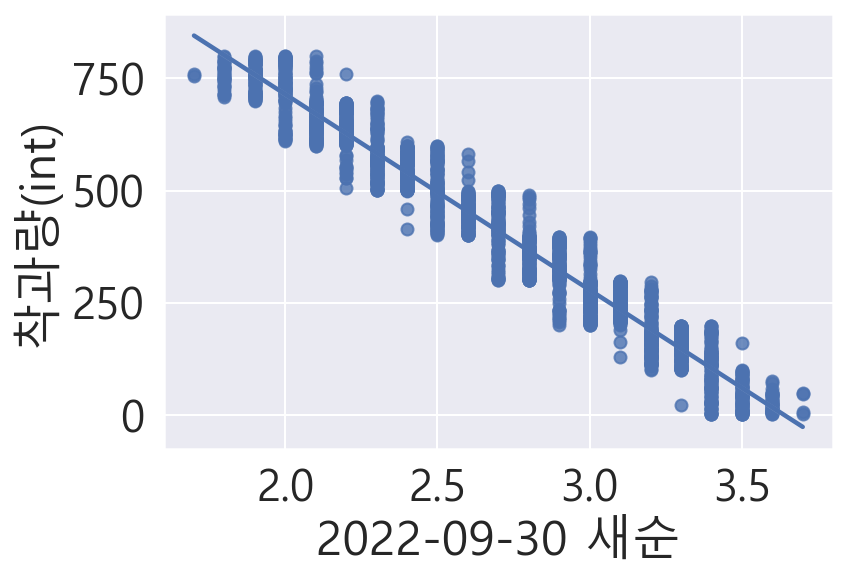

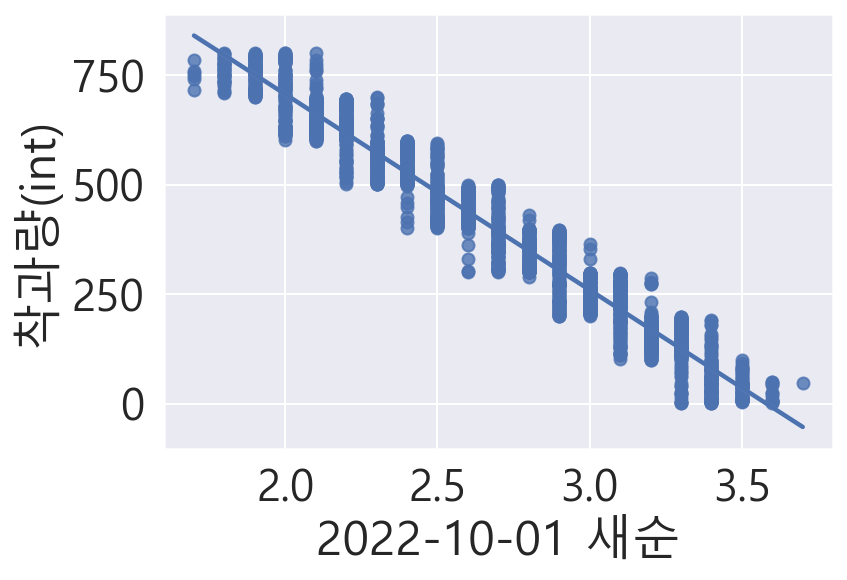

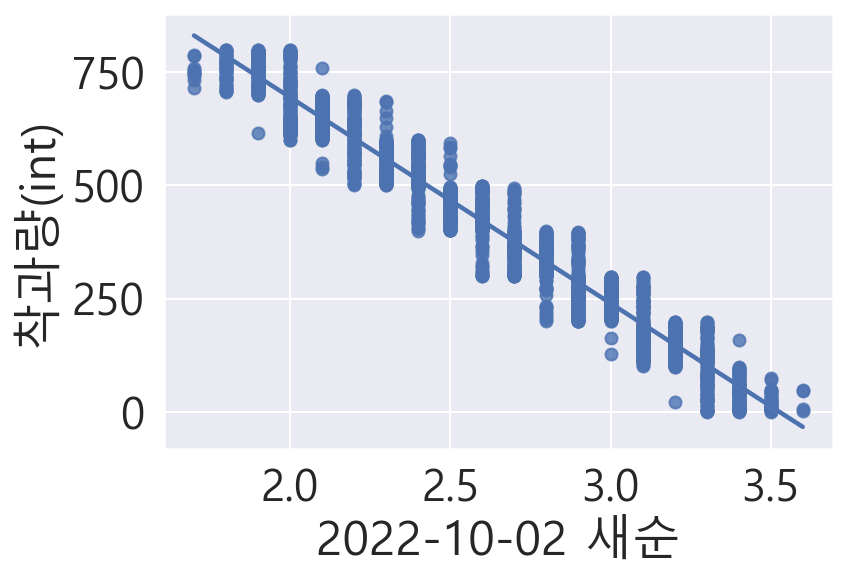

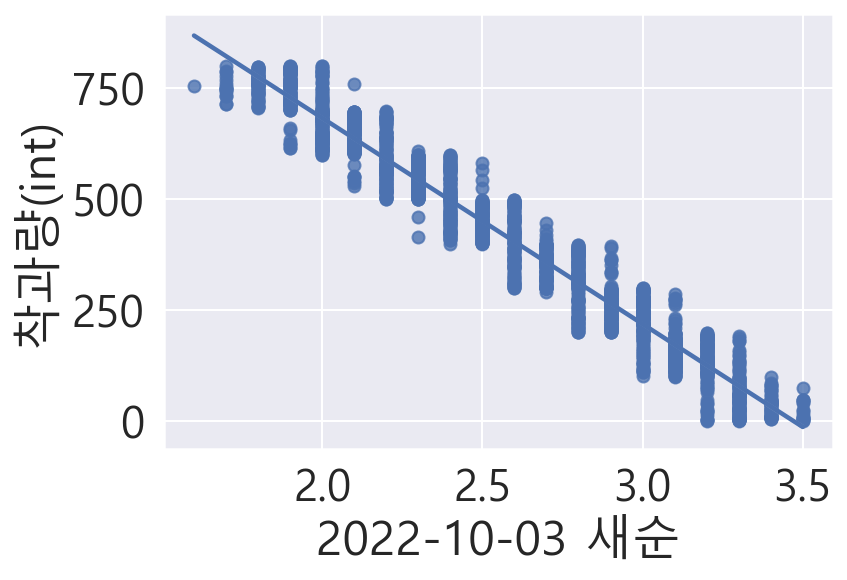

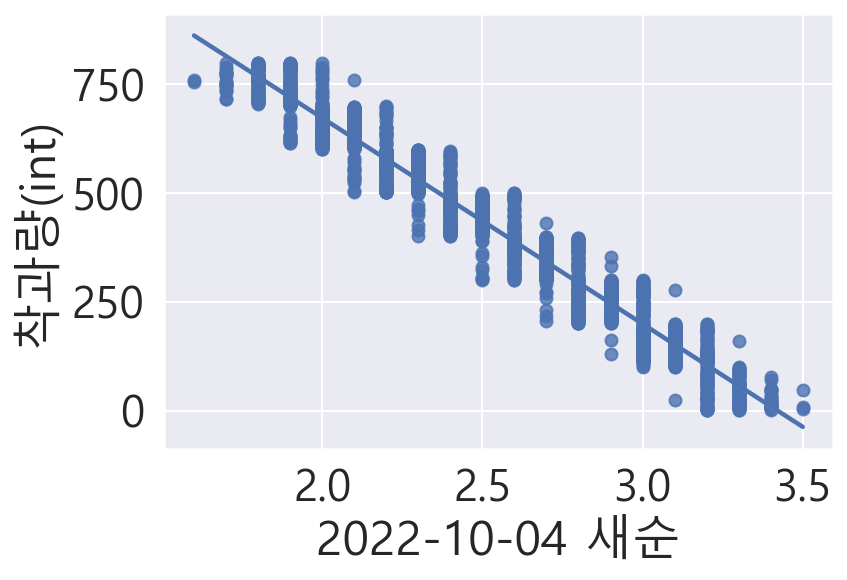

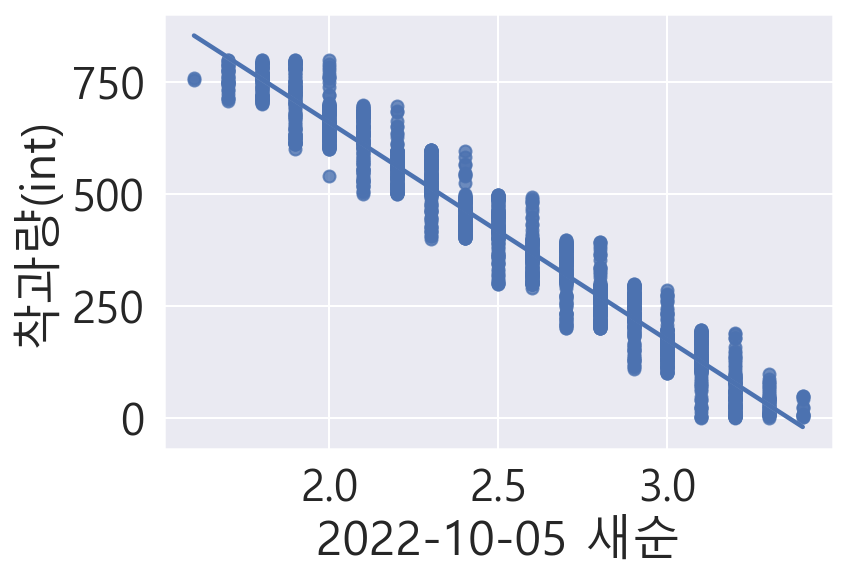

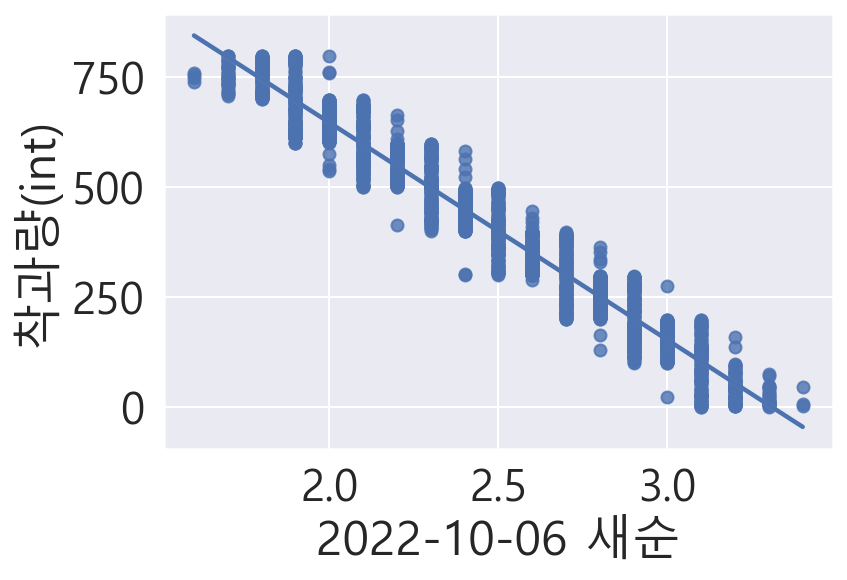

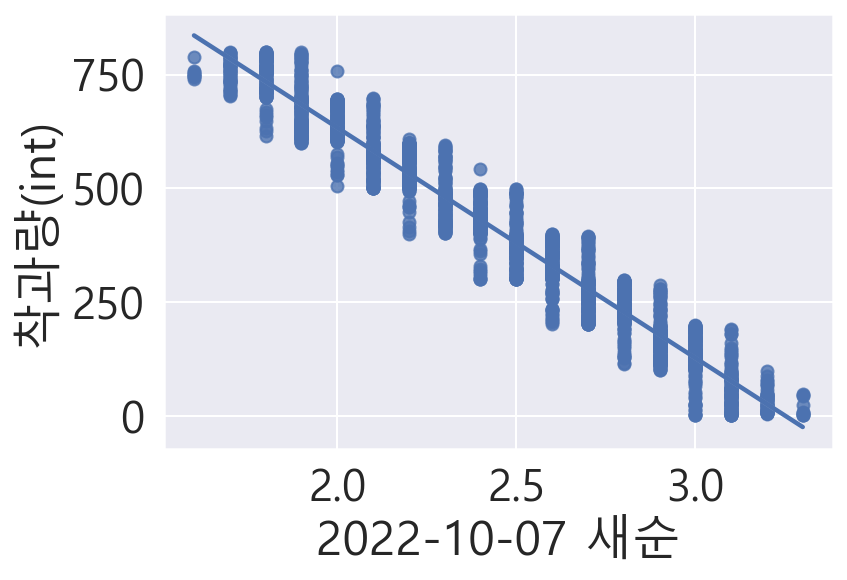

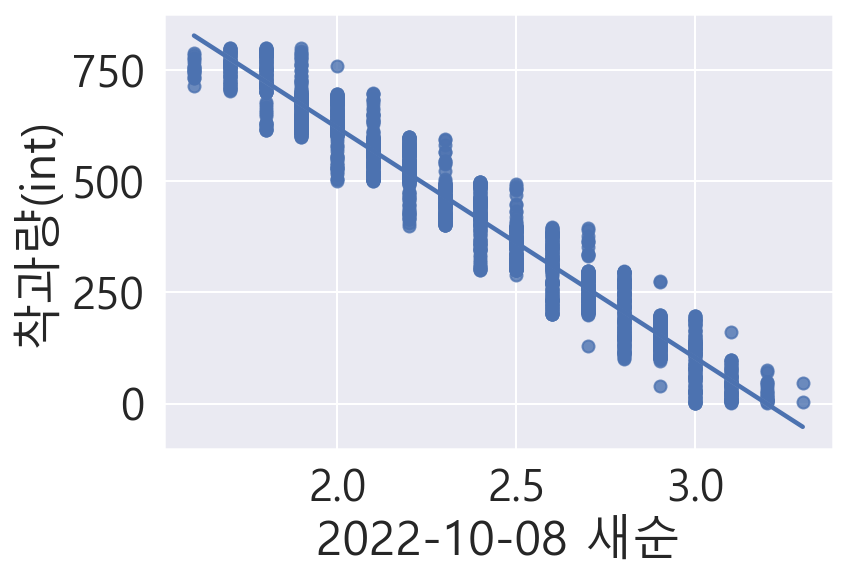

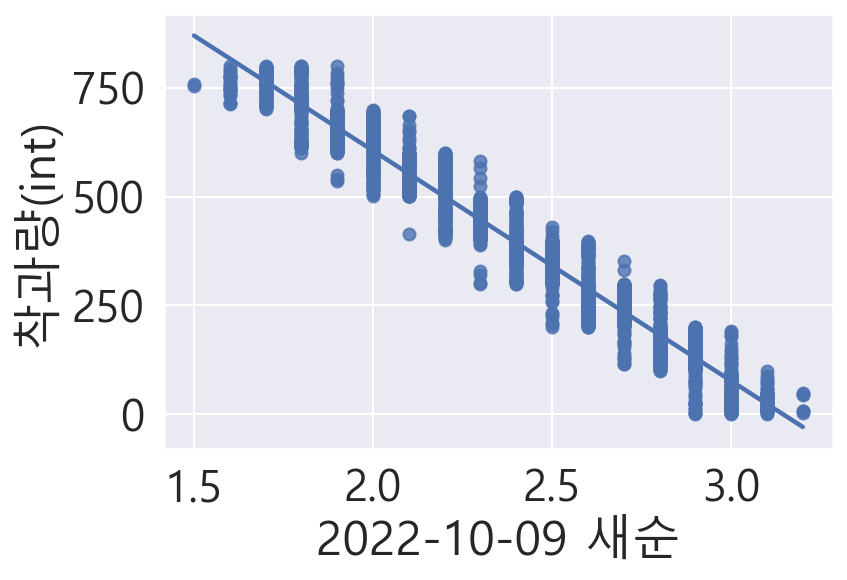

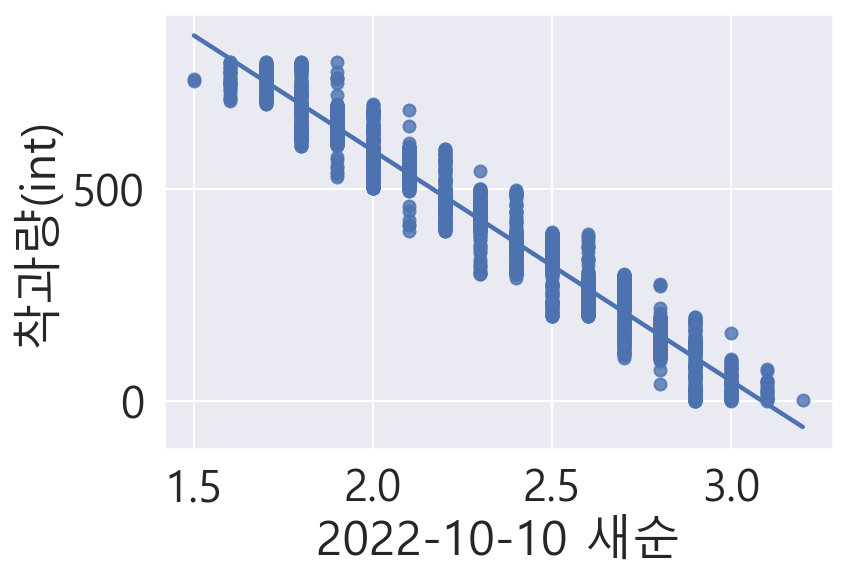

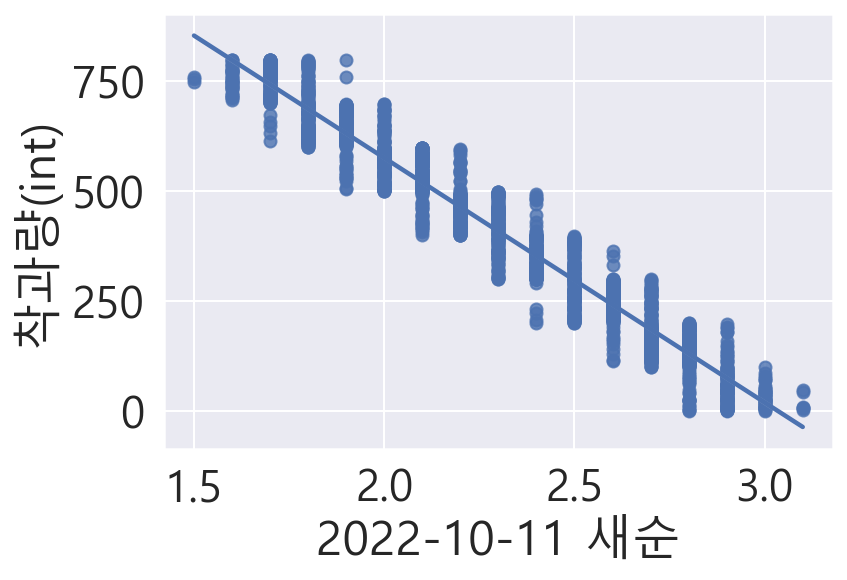

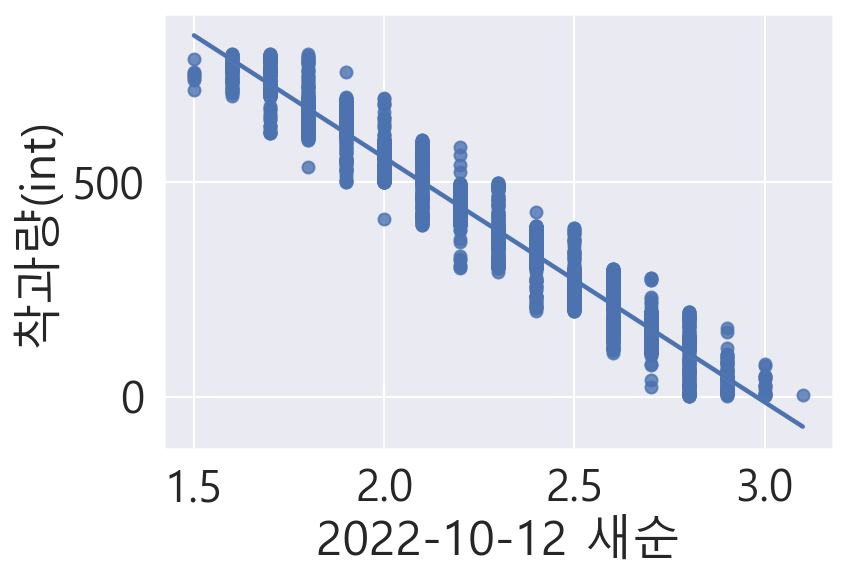

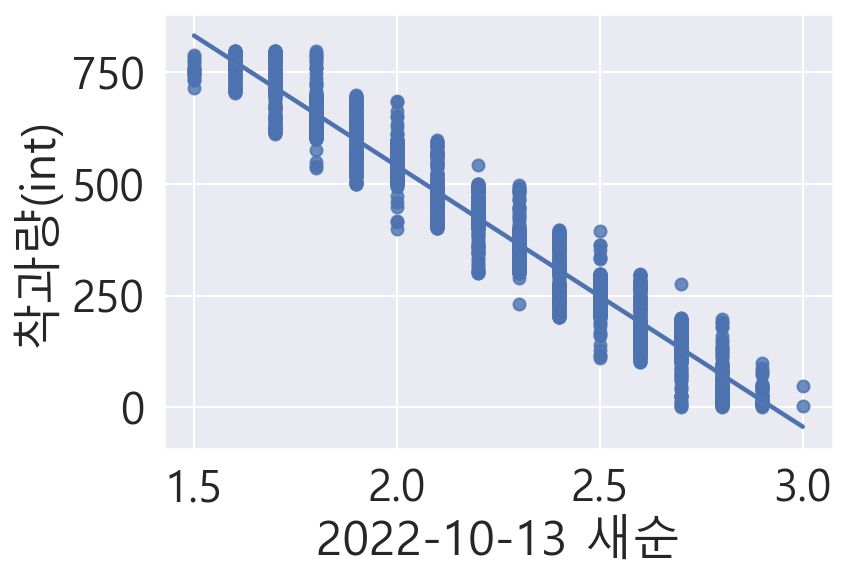

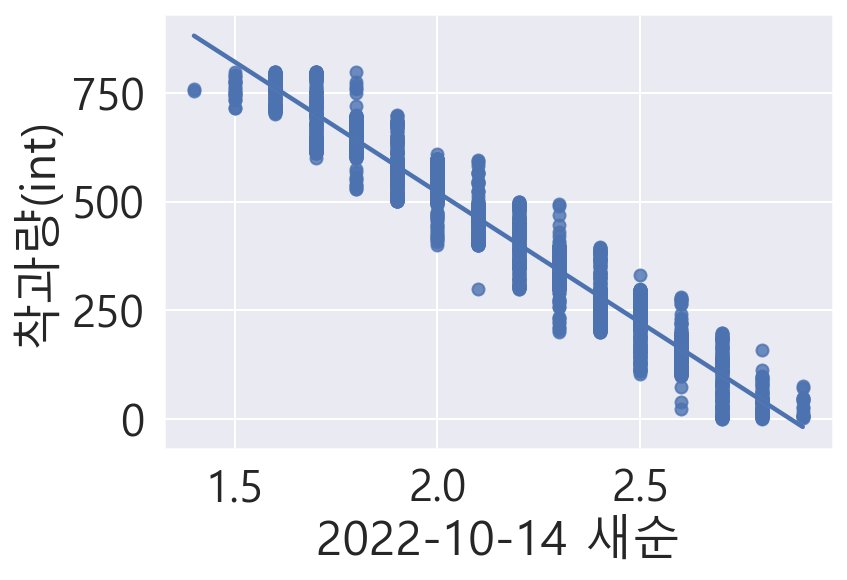

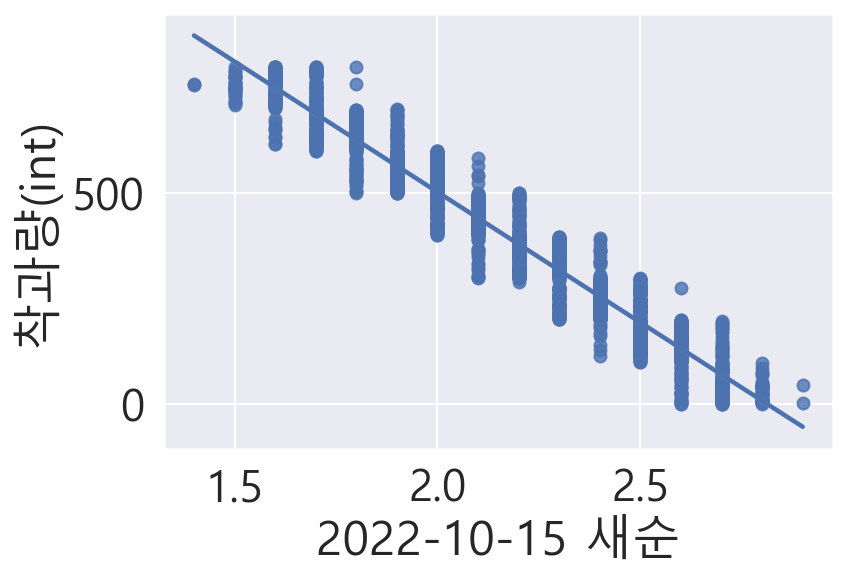

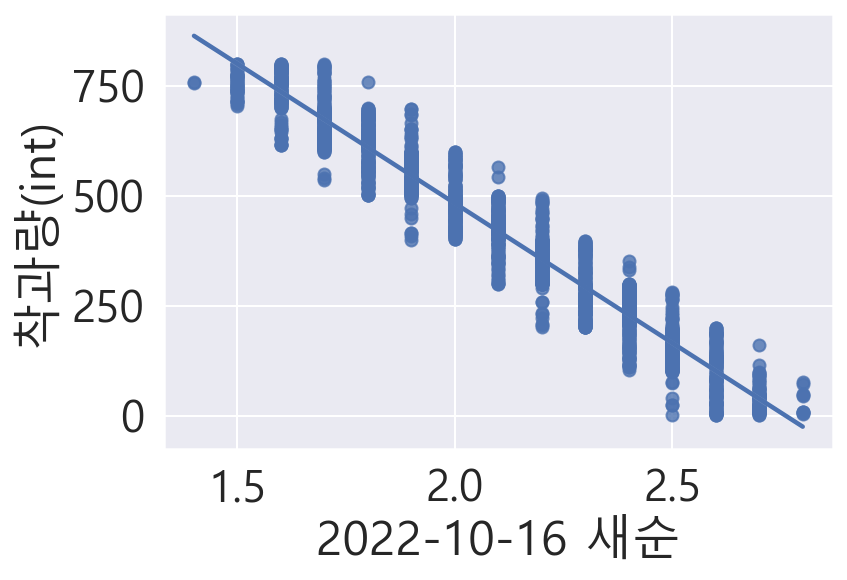

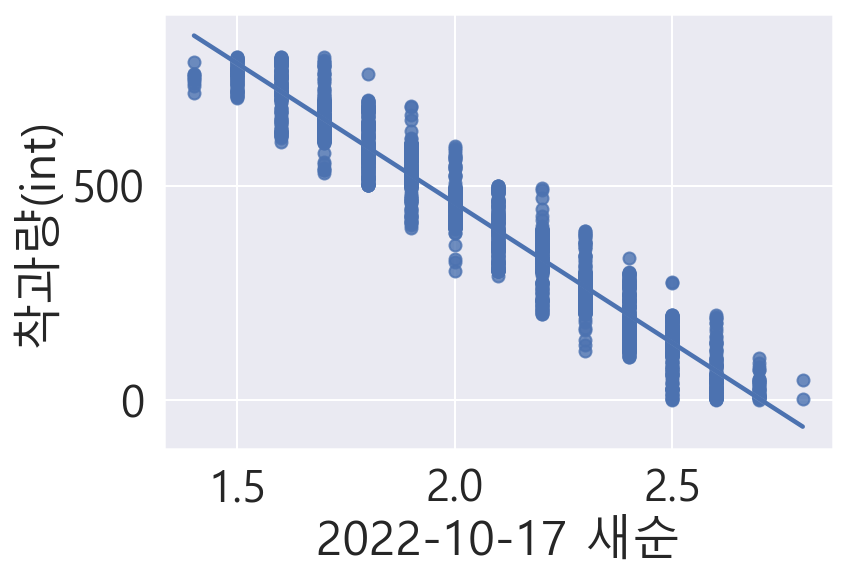

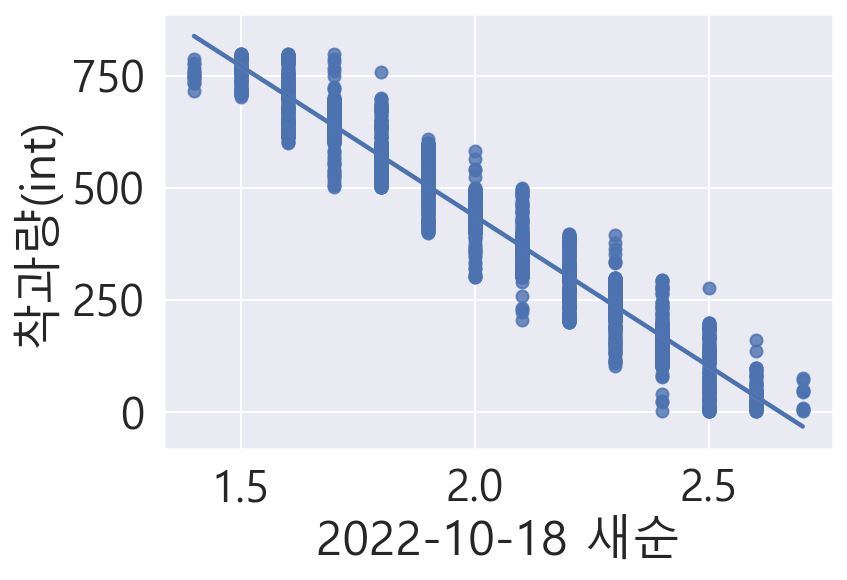

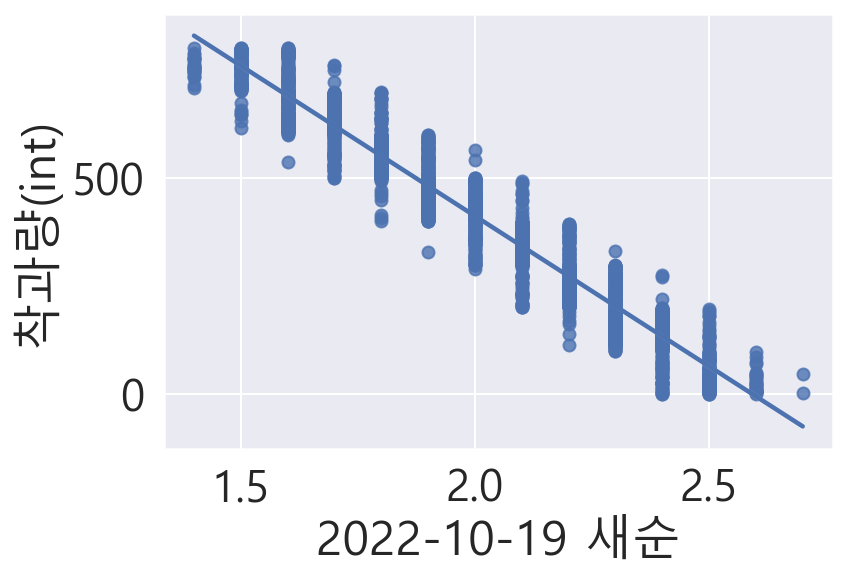

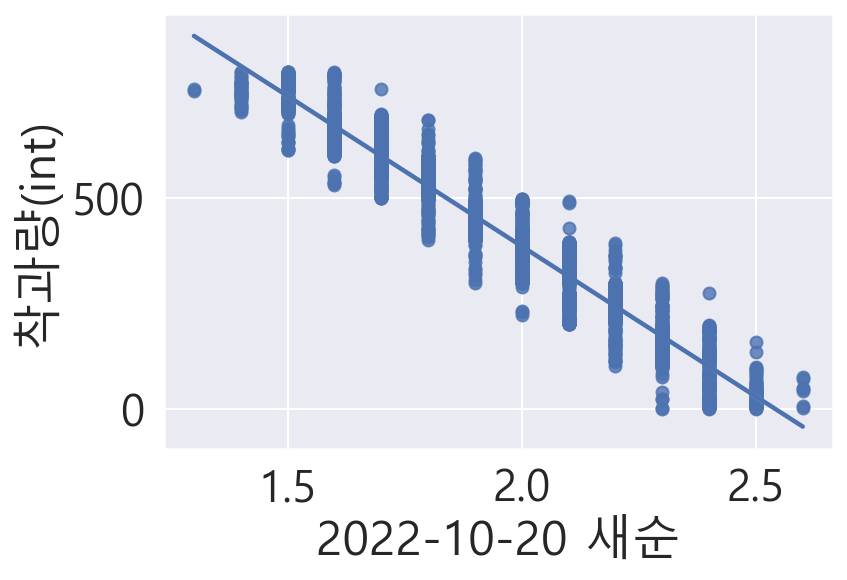

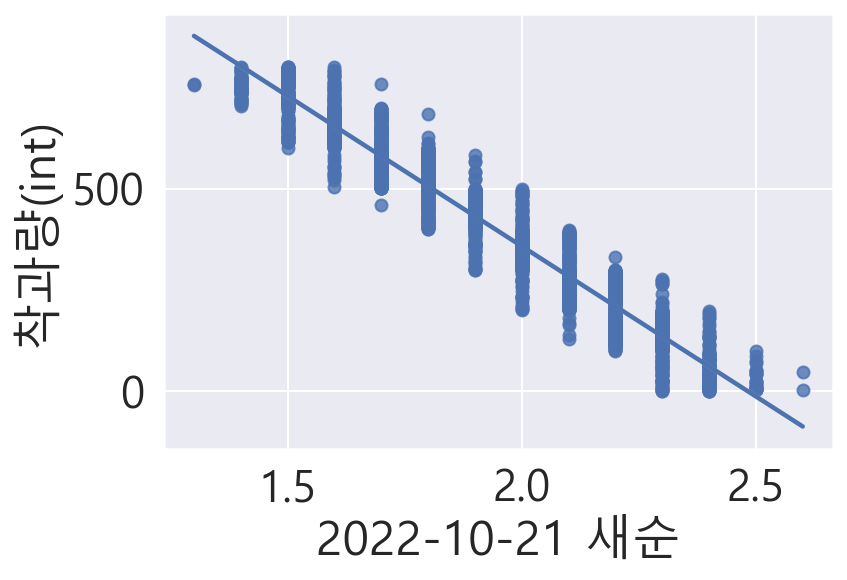

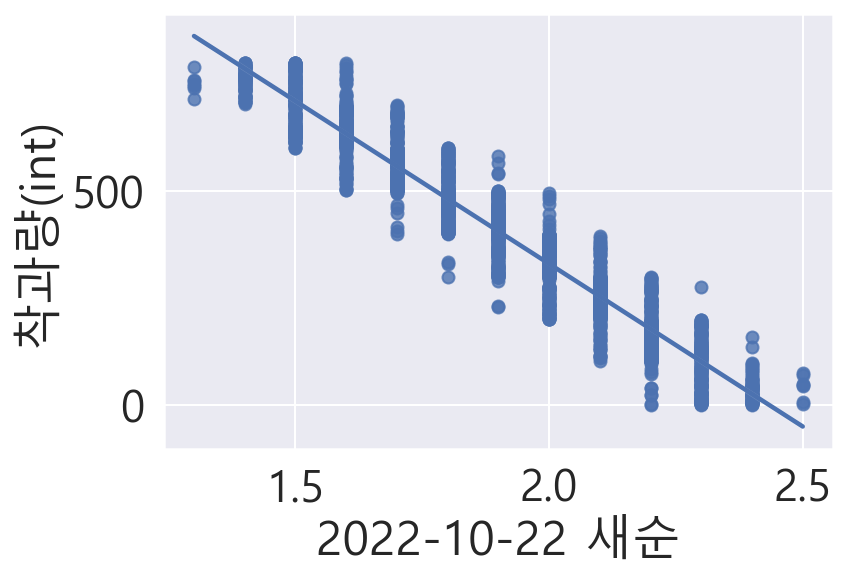

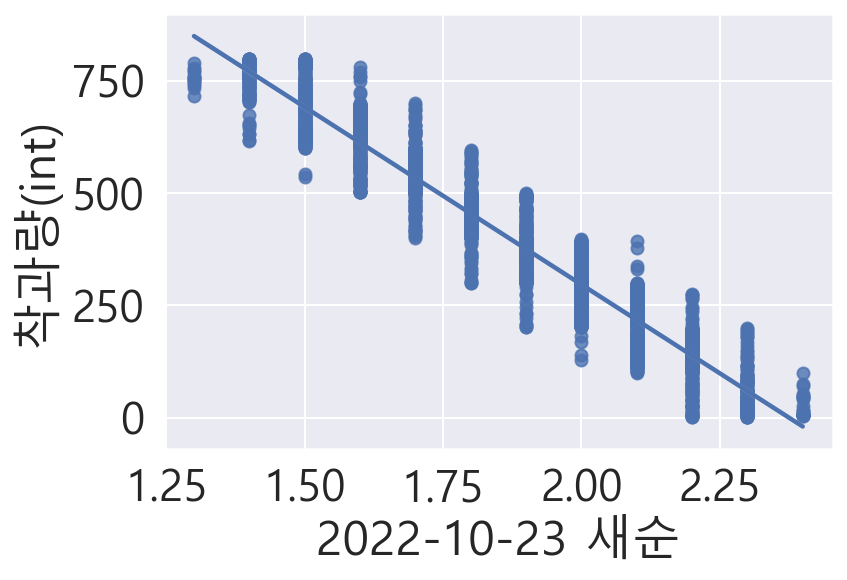

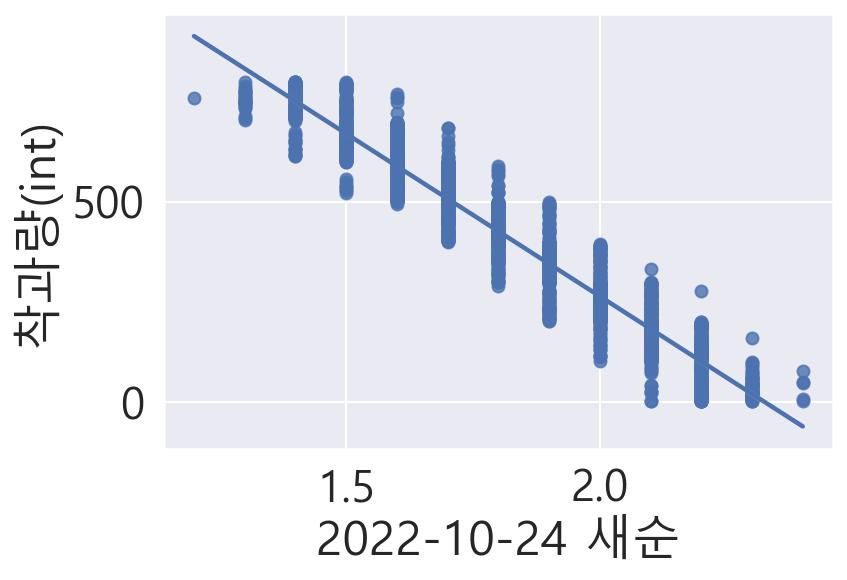

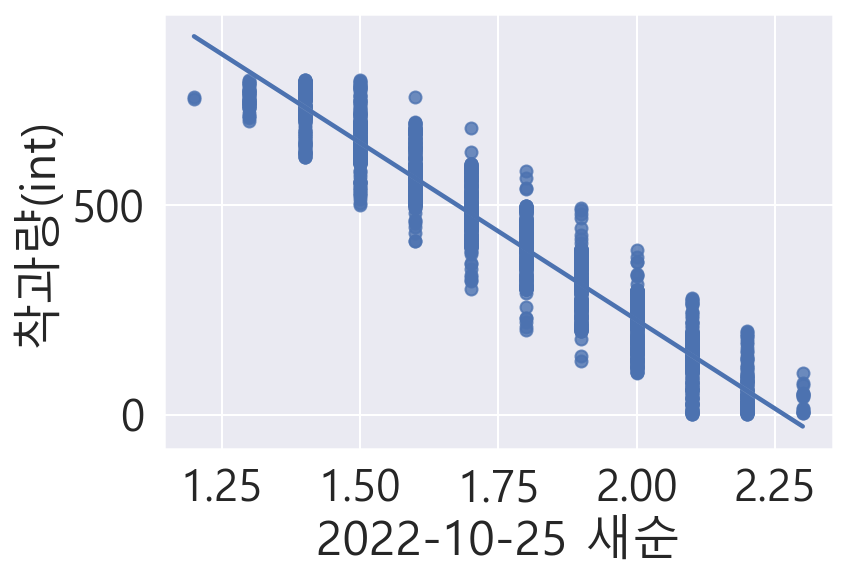

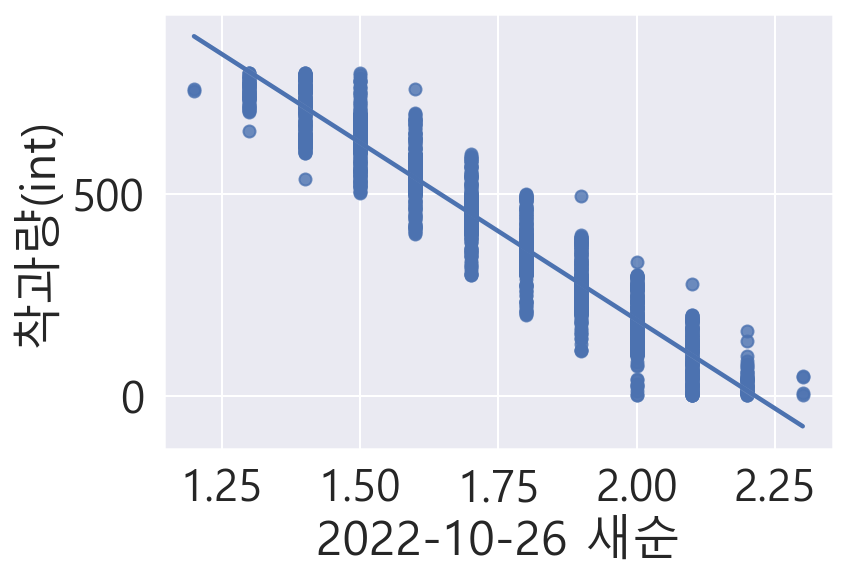

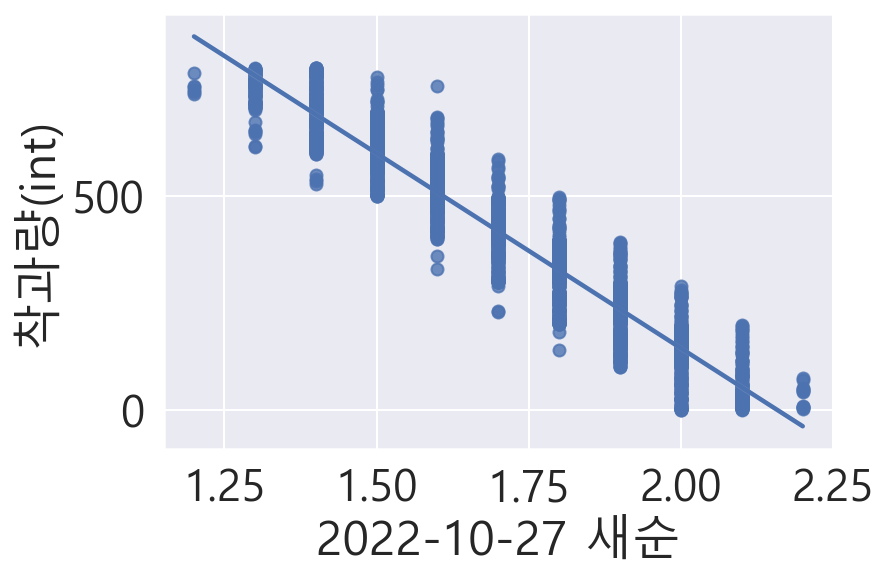

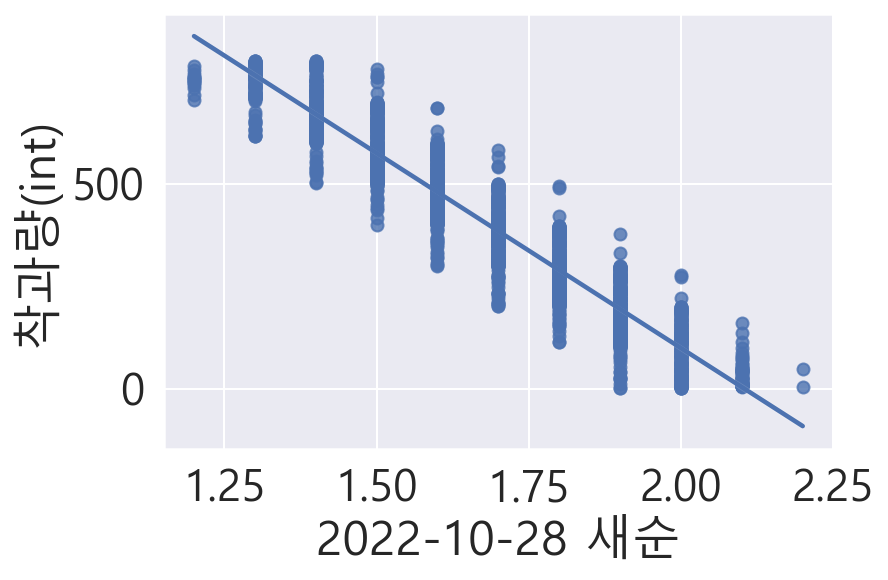

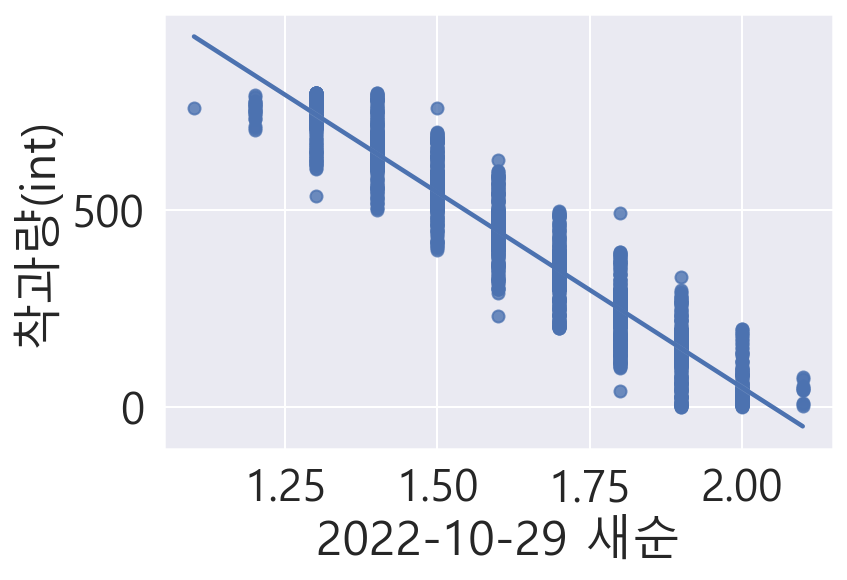

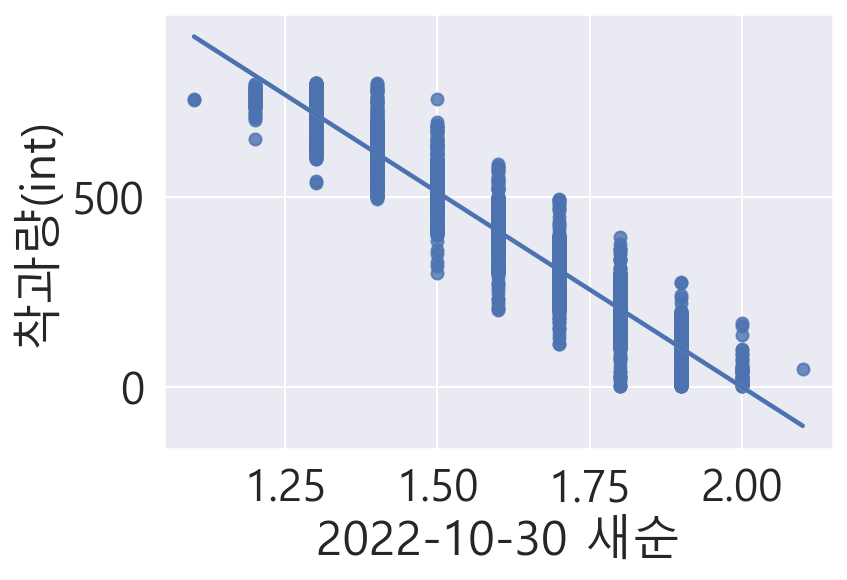

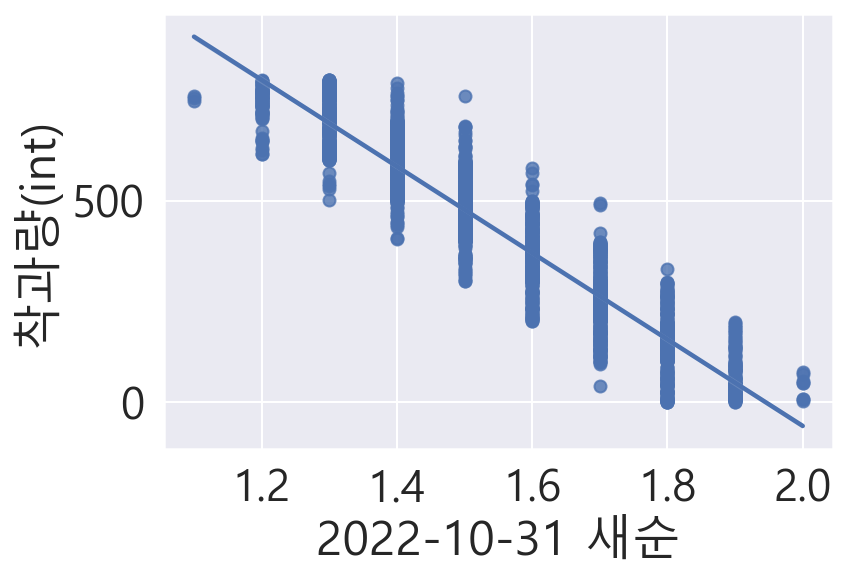

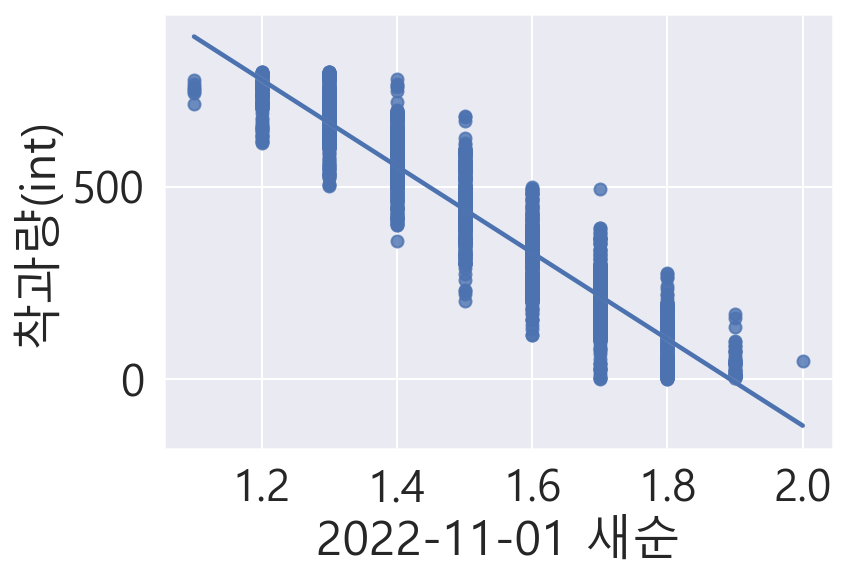

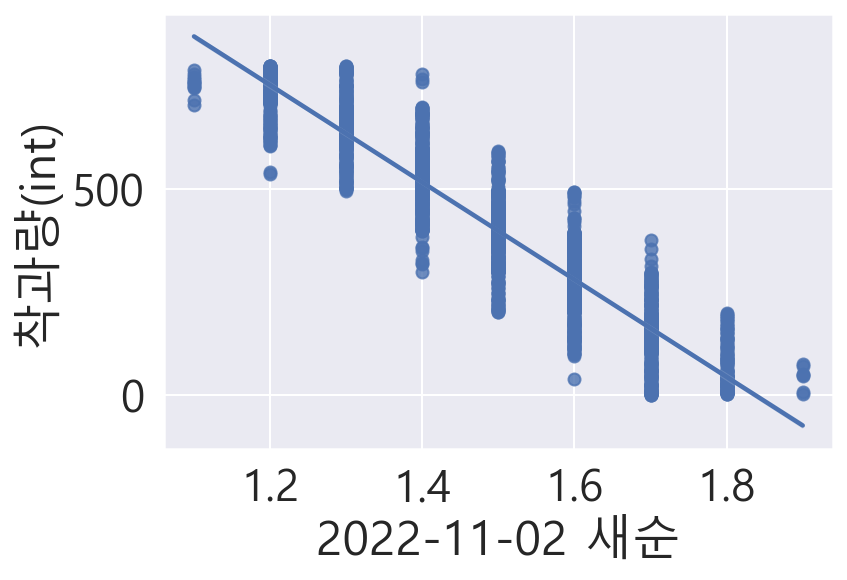

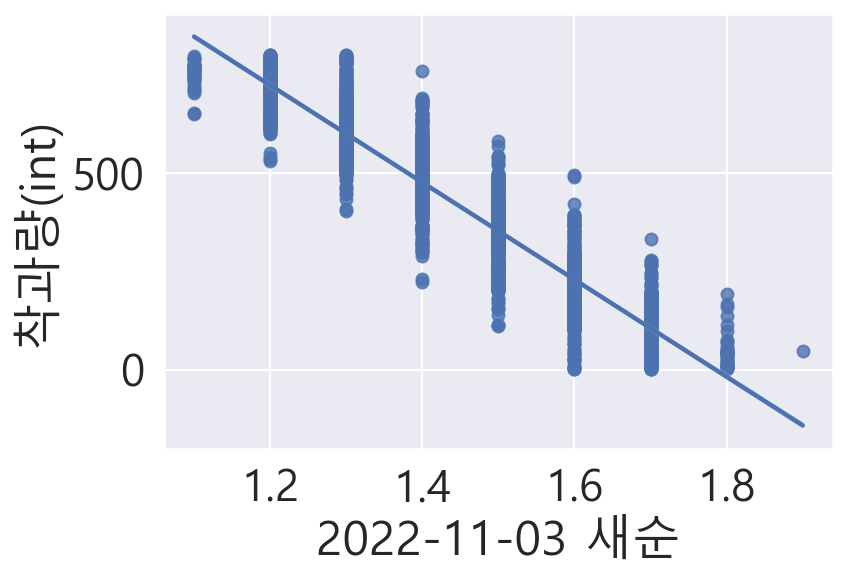

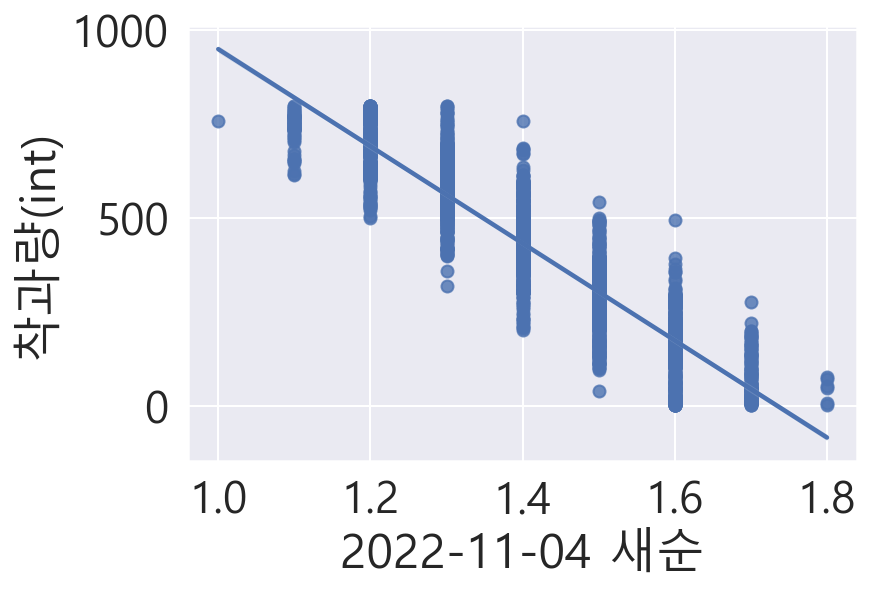

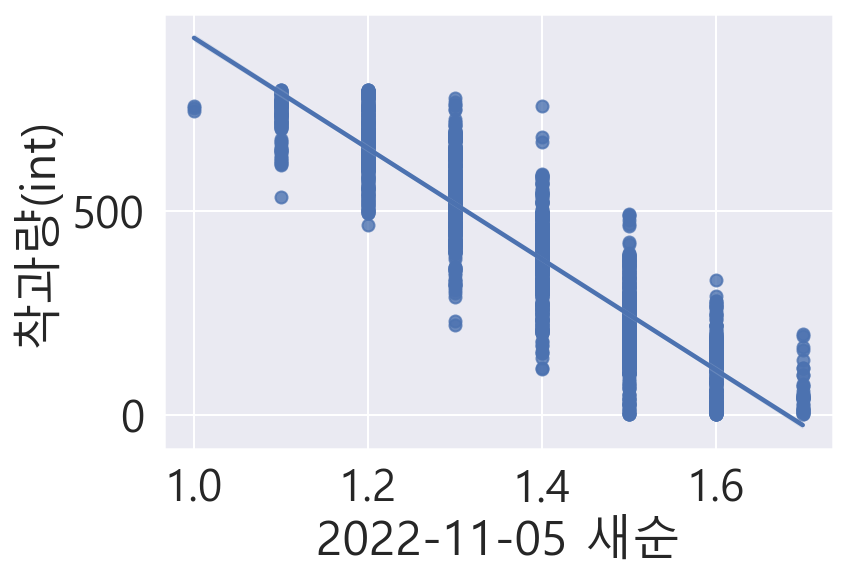

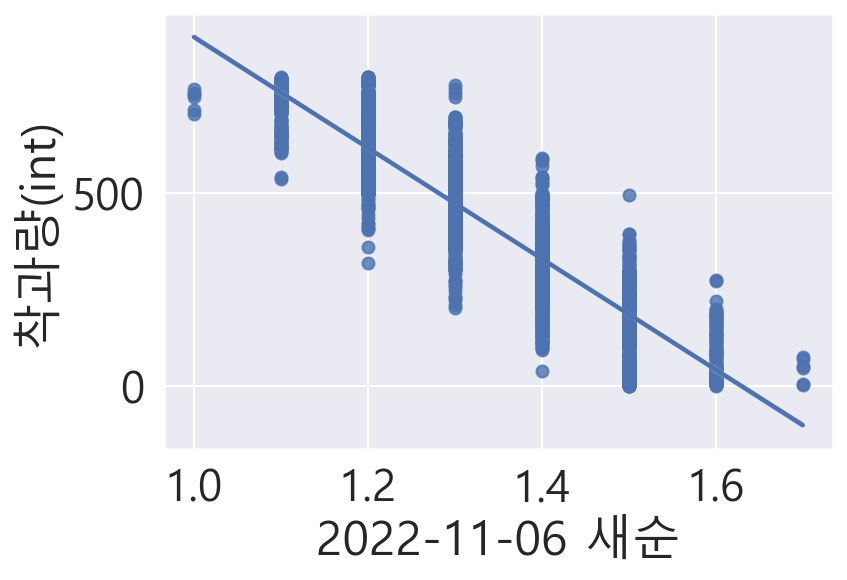

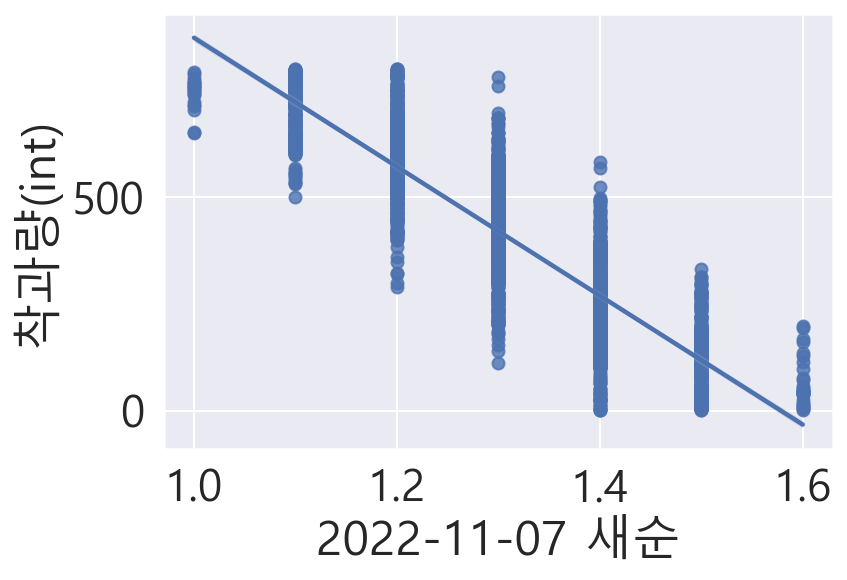

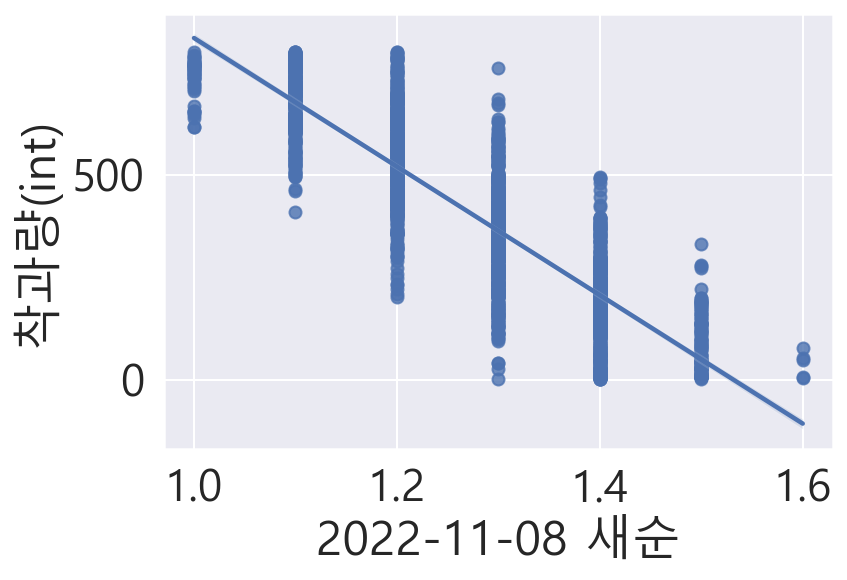

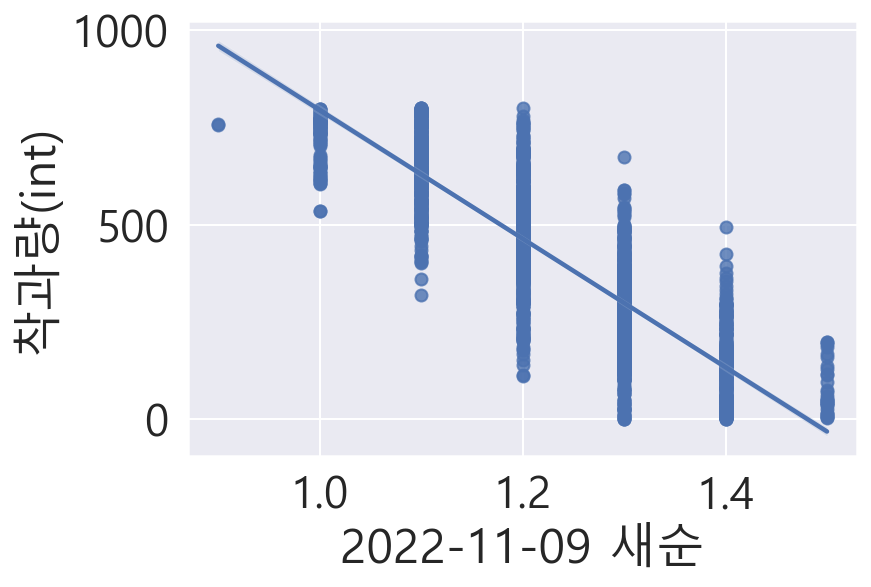

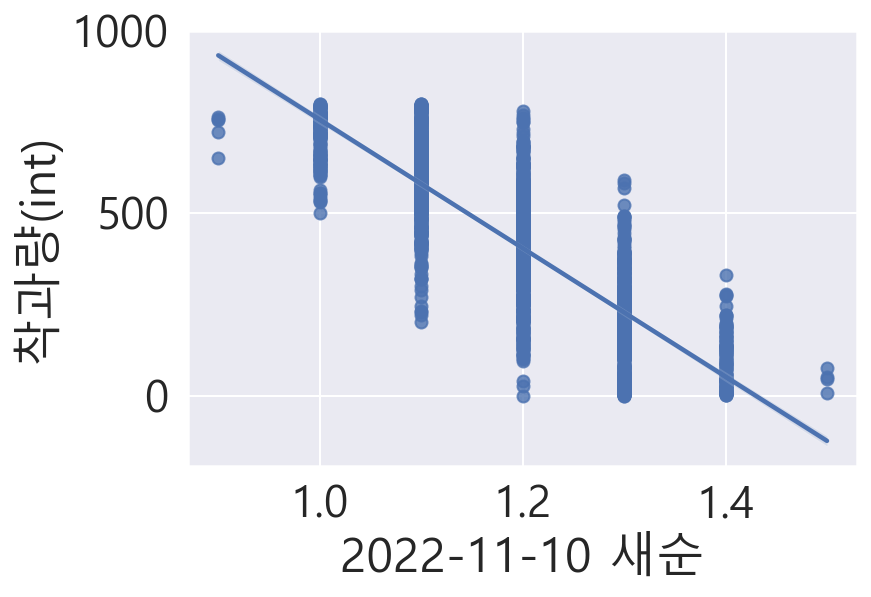

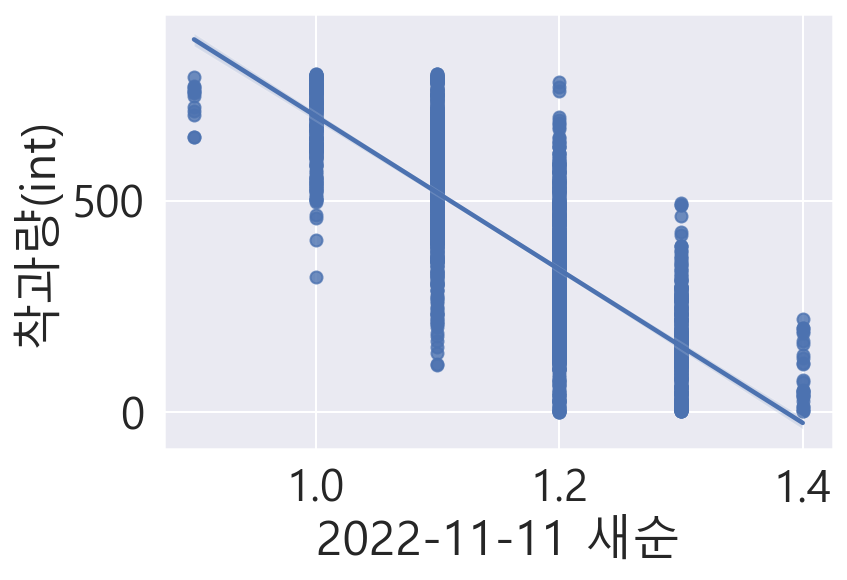

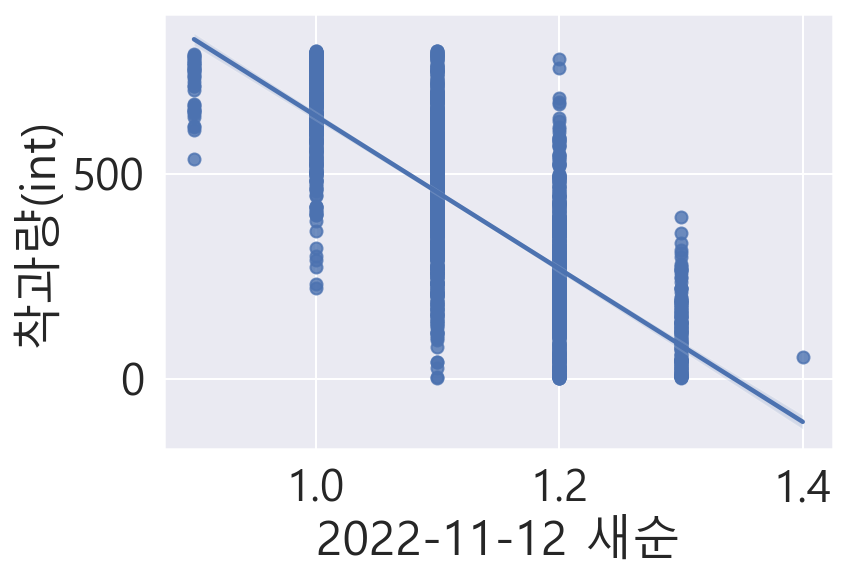

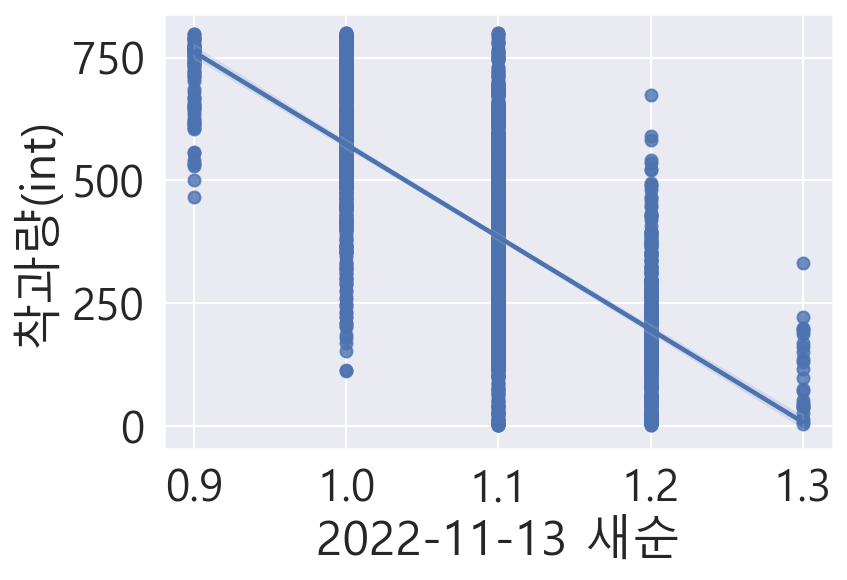

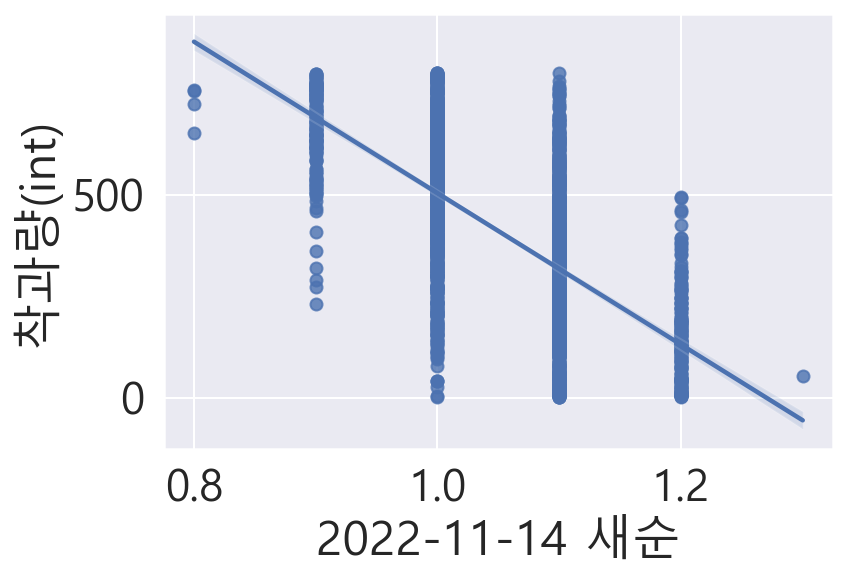

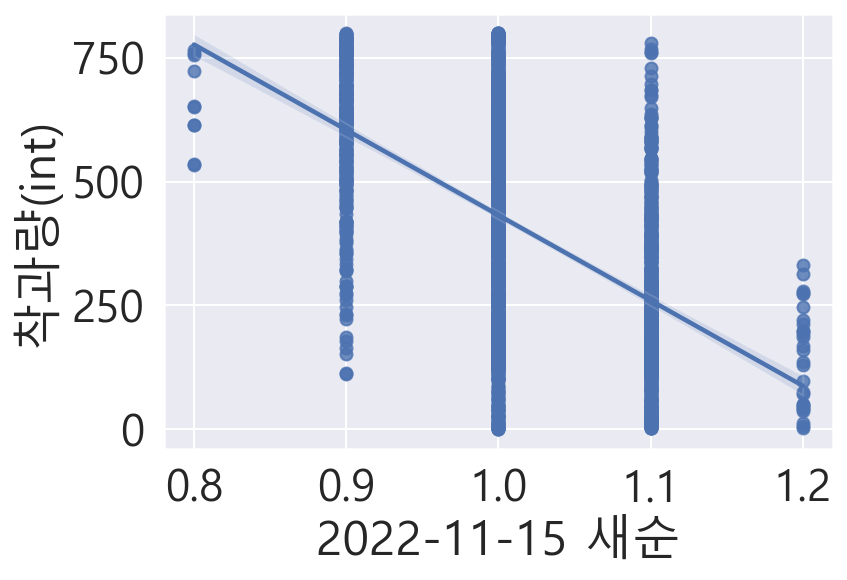

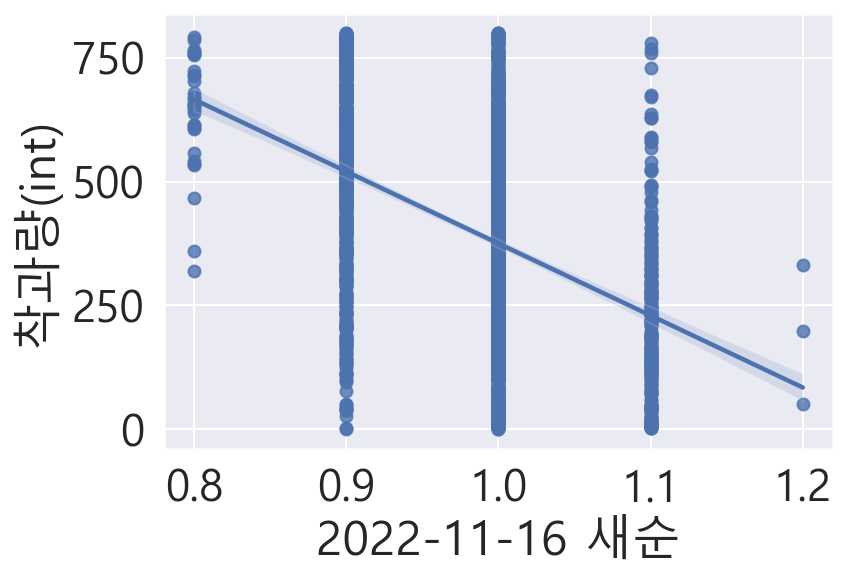

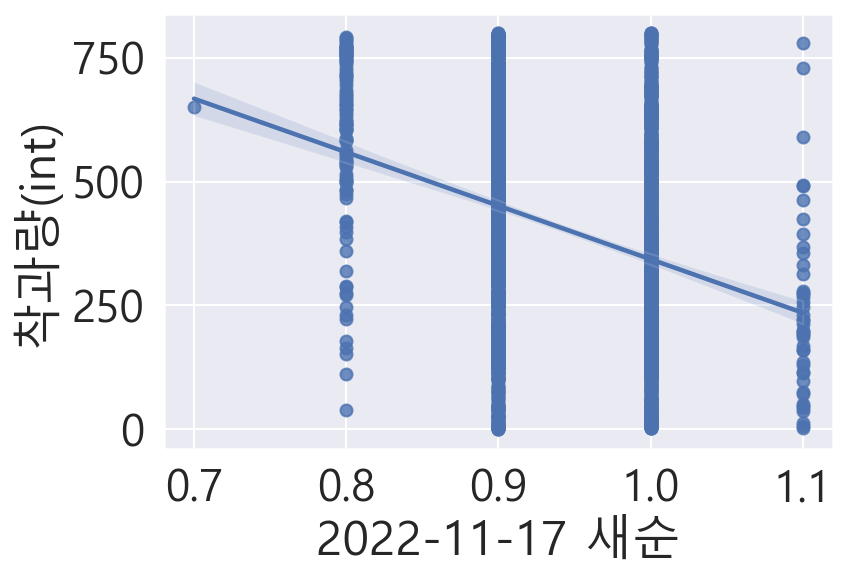

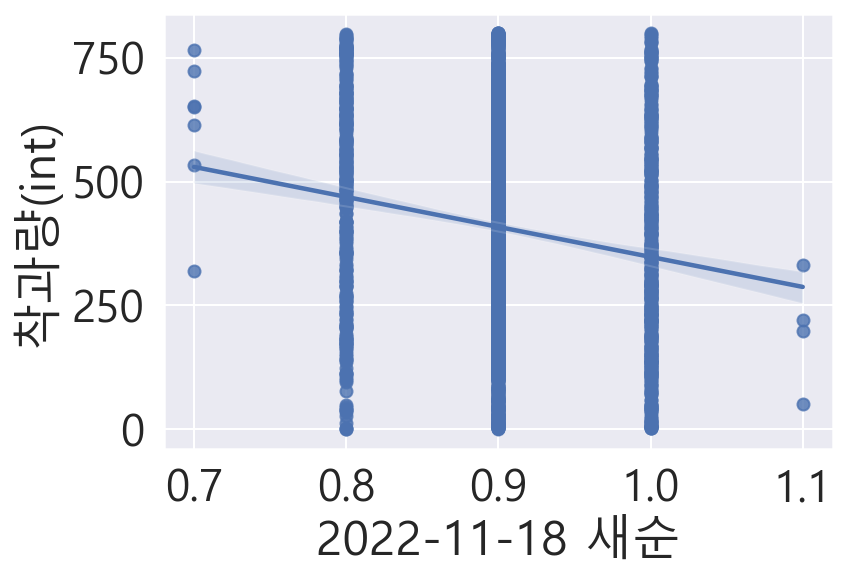

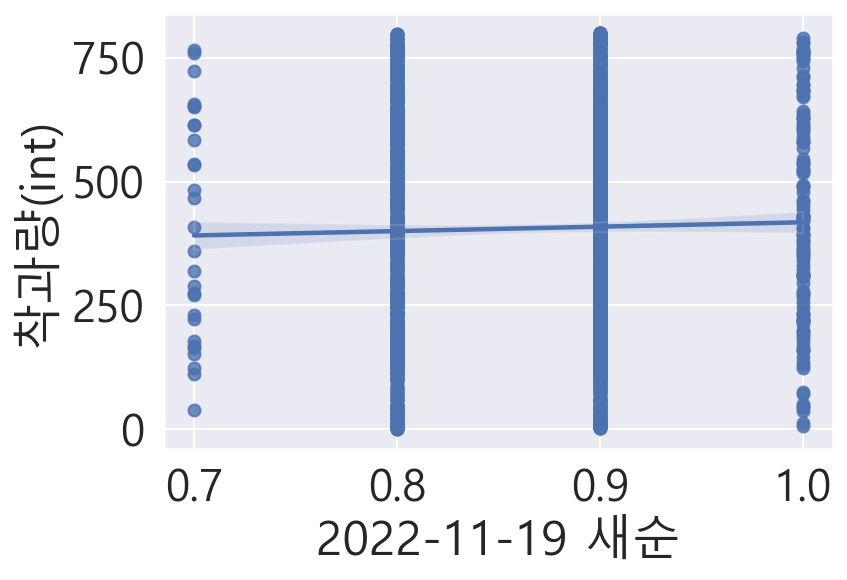

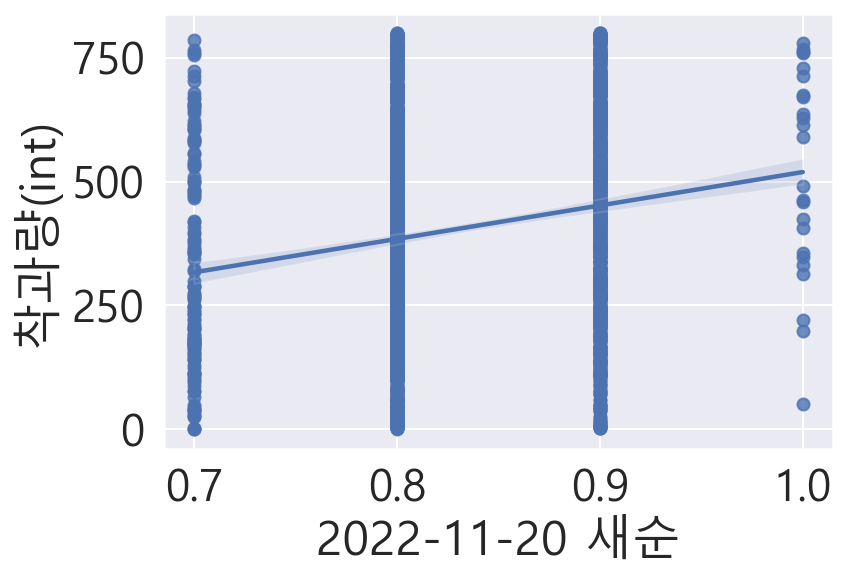

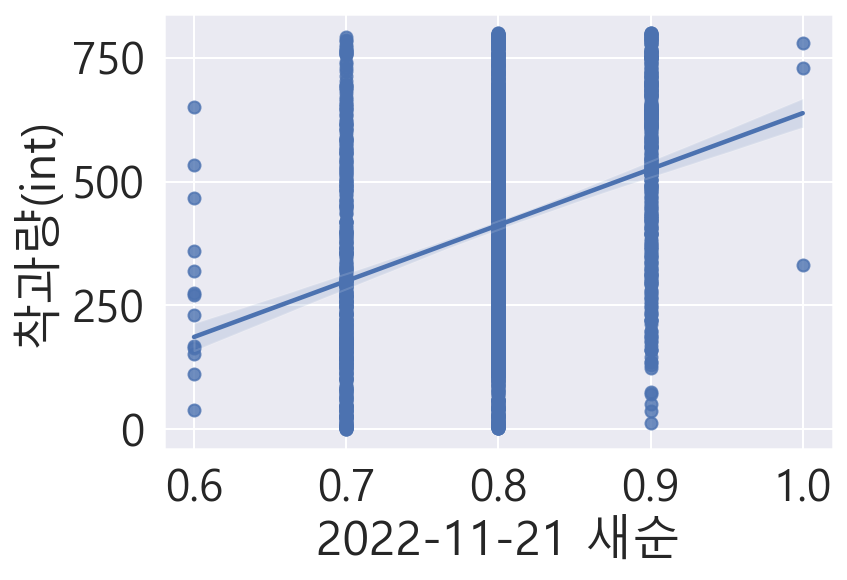

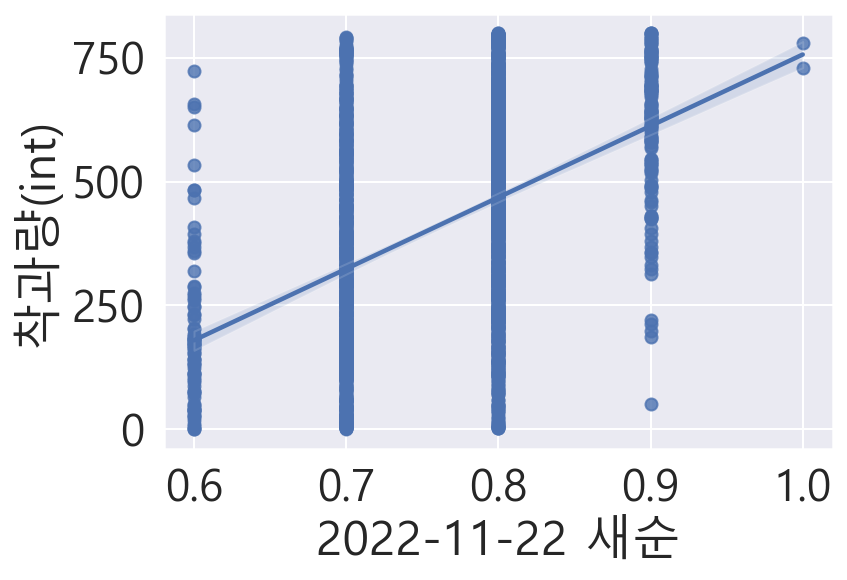

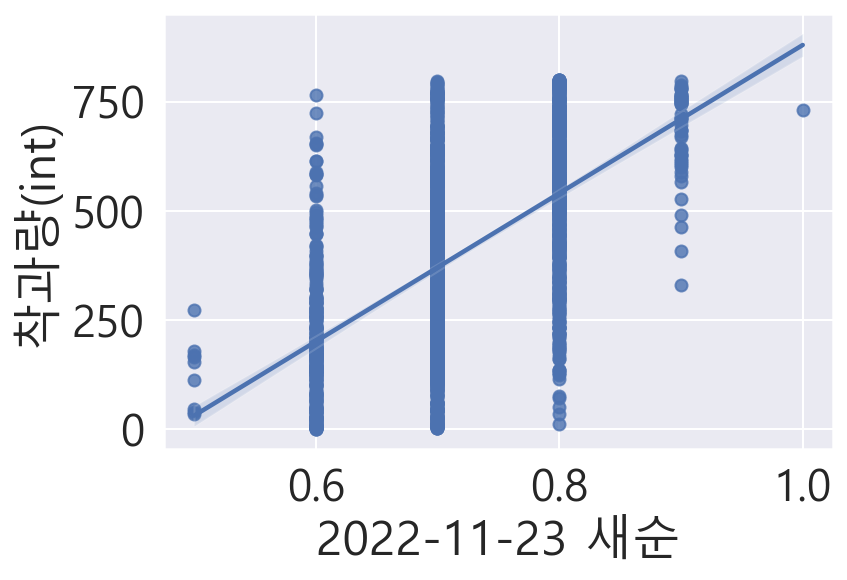

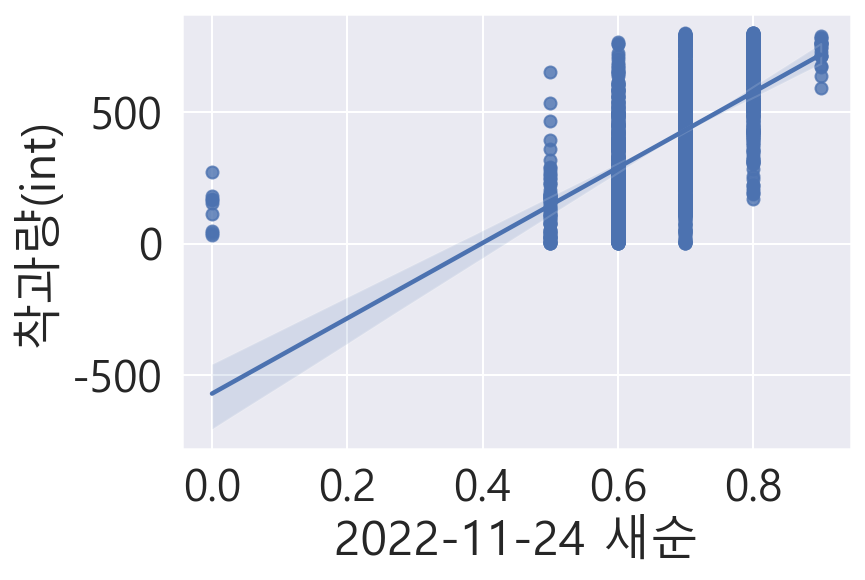

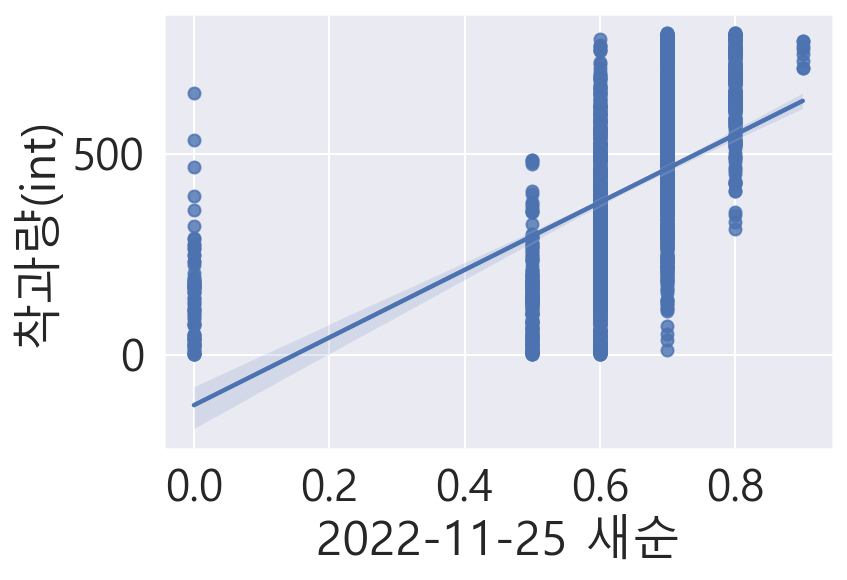

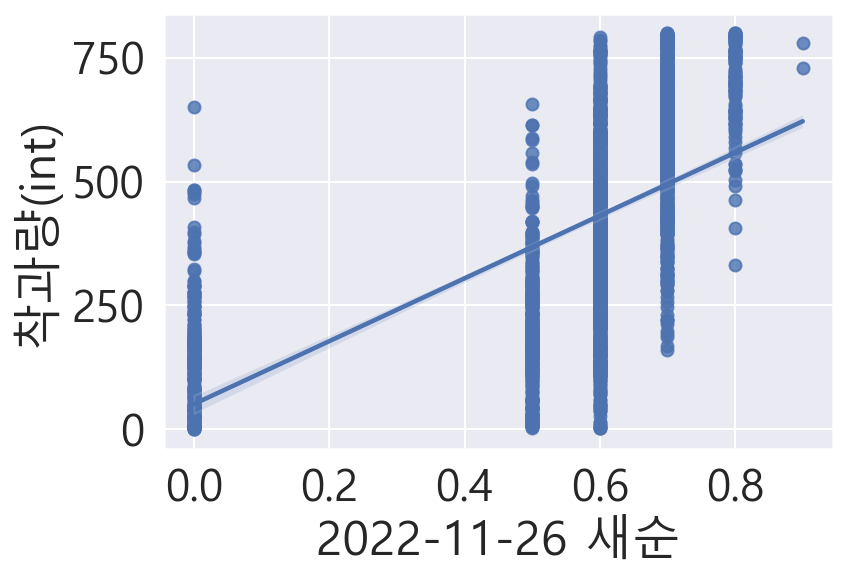

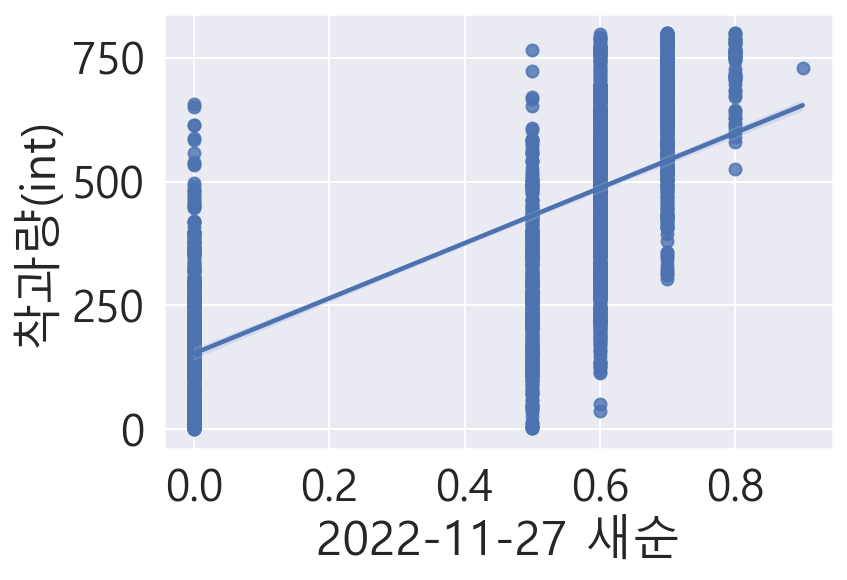

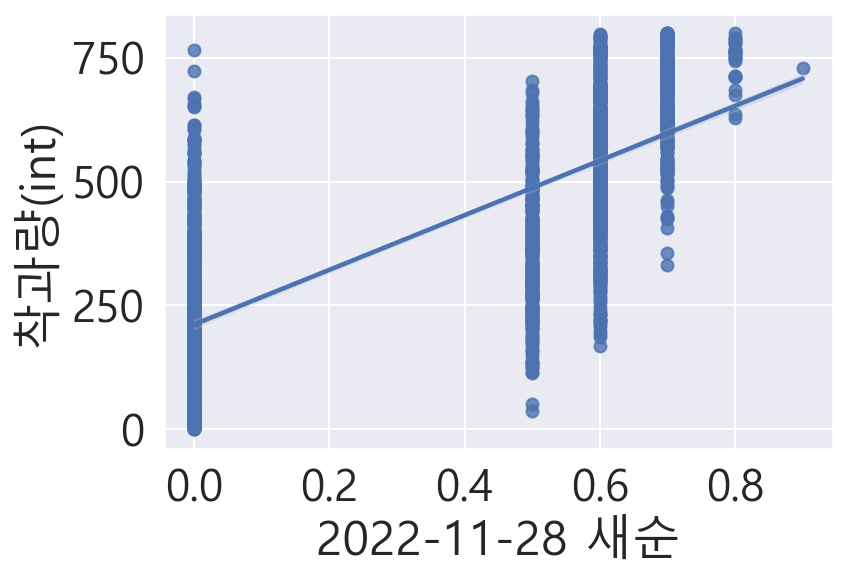

In [124]:
""" for i in 새순:
    sns.regplot(data= train, x=i,y='착과량(int)')
    plt.show() """

In [33]:
엽록소 = [i for i in list(train.columns) if '엽록소' in i]

<AxesSubplot:>

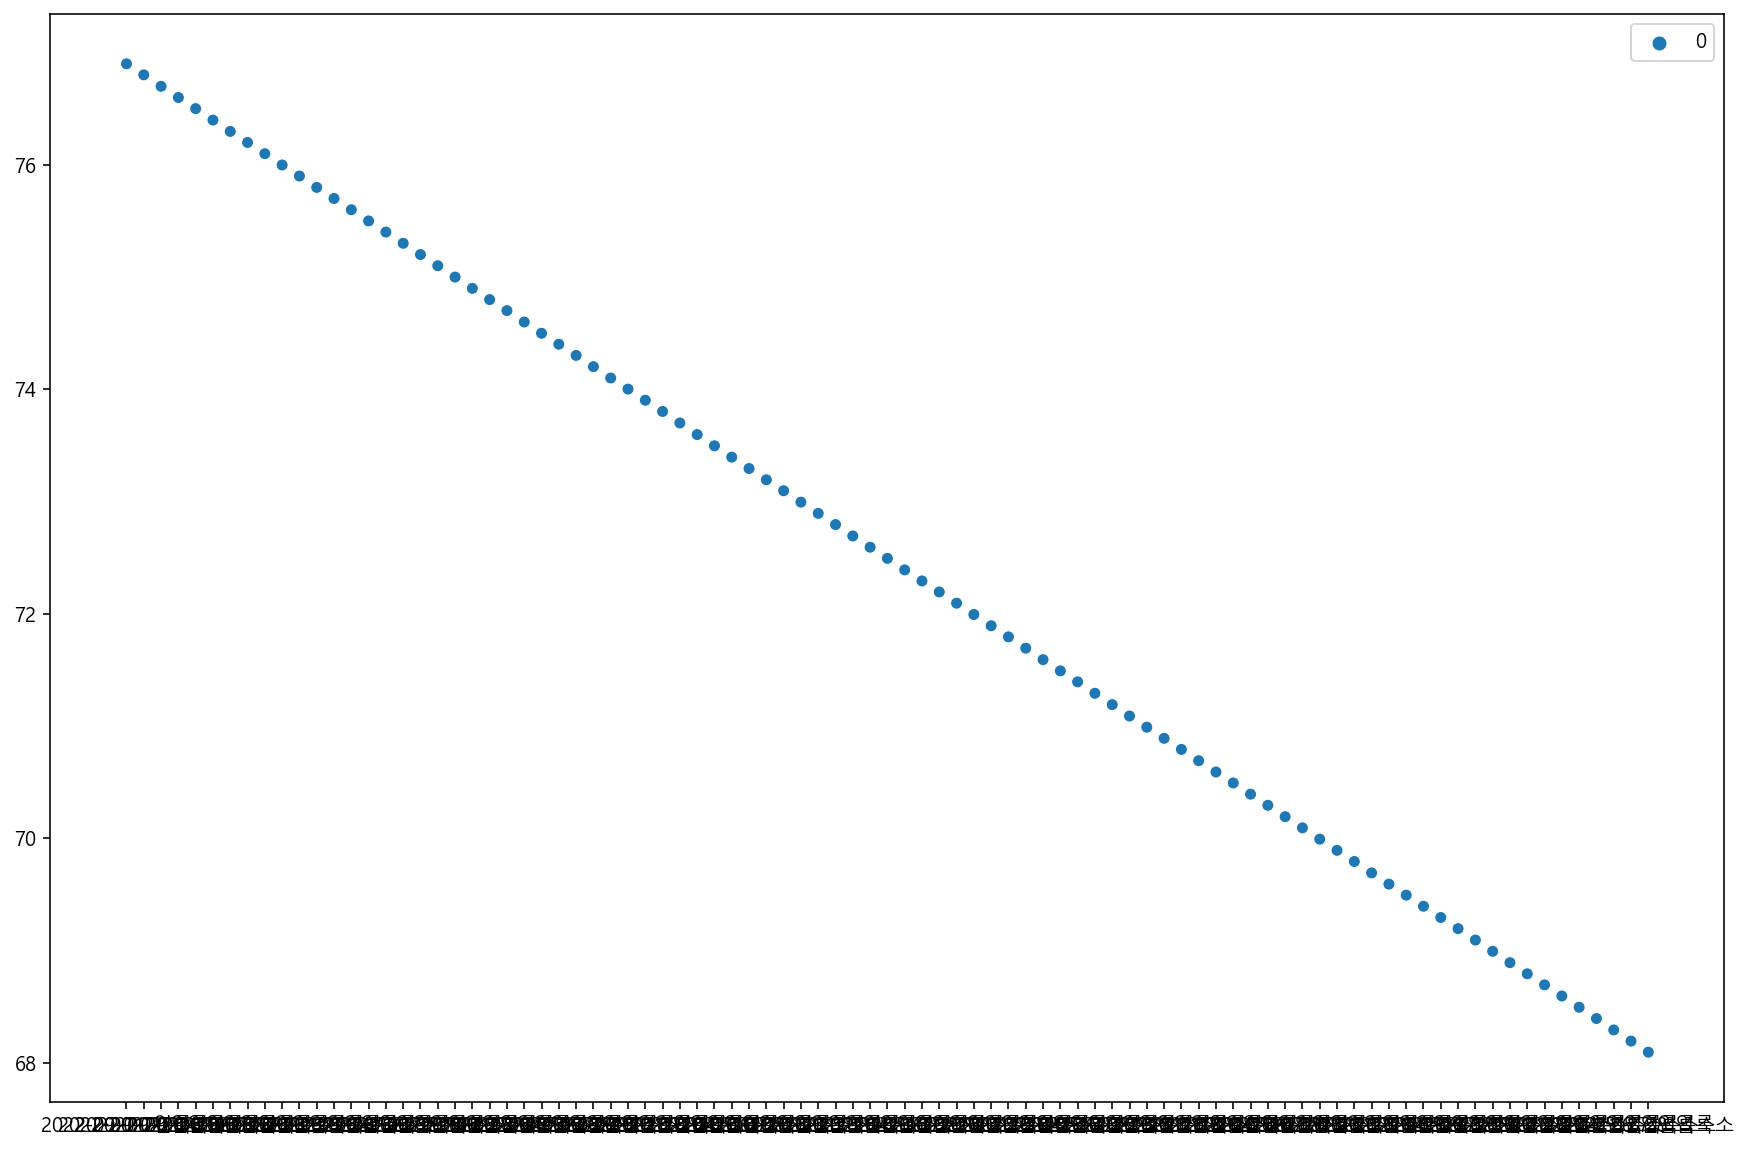

In [34]:
dict_엽록소평균 = {}
for i in 엽록소:
    dict_엽록소평균[i] = sum(train[i])/len(train)

df_엽록소평균 = pd.DataFrame(pd.Series(dict_엽록소평균))

plt.figure(figsize = (15, 10))
sns.scatterplot(data=df_엽록소평균)

In [ ]:
""" for i in 엽록소:
    sns.scatterplot(data= train, x=i,y='착과량(int)')
    plt.show() """

# ML

## 전처리전

In [109]:
train

ID  착과량(int)  수고(m)  수관폭1(min)  수관폭2(max)  수관폭평균  2022-09-01 새순  \
0     TRAIN_0000       692  275.0      287.0      292.0  289.5            2.8   
1     TRAIN_0001       534  293.0      284.0      336.0  310.0            3.3   
2     TRAIN_0002       634  300.0      392.0      450.0  421.0            3.0   
3     TRAIN_0003       639  289.0      368.0      379.0  373.5            3.1   
4     TRAIN_0004       496  306.0      353.0      358.0  355.5            3.7   
...          ...       ...    ...        ...        ...    ...            ...   
2202  TRAIN_2202       119  230.0      353.0      367.0  360.0            4.7   
2203  TRAIN_2203       611  266.0      337.0      400.0  368.5            3.1   
2204  TRAIN_2204       650  237.0      353.0      362.0  357.5            3.0   
2205  TRAIN_2205       363  281.0      337.0      403.0  370.0            3.9   
2206  TRAIN_2206        17  228.0      389.0      398.0  393.5            5.3   

      2022-09-02 새순  2022-09-03 새순  2022-09-04 새순  ...  2022-11-23 엽록소  \
0               2.8            2.7            2.7  ...       70.427356   
1               3.3            3.3            3.2  ...       70.955608   
2               2.9            2.9            2.9  ...       70.920038   
3               3.0            3.0            3.0  ...       69.779813   
4               3.6            3.6            3.6  ...       68.040083   
...             ...            ...            ...  ...             ...   
2202            4.6            4.5            4.5  ...       66.109845   
2203            3.0            3.0            3.0  ...       73.271361   
2204            3.0            2.9            2.9  ...       67.117025   
2205            3.9            3.8            3.8  ...       66.323613   
2206            5.2            5.2            5.1  ...       72.389570   

      2022-11-24 엽록소  2022-11-25 엽록소  2022-11-26 엽록소  2022-11-27 엽록소  \
0          70.340491       70.293830       70.262422       70.169841   
1          70.796630       70.597550       70.565088       70.560502   
2          70.876723       70.710129       70.595971       70.418203   
3          69.614644       69.455404       69.281590       69.238689   
4          67.859963       67.775556       67.701456       67.504244   
...              ...             ...             ...             ...   
2202       66.008775       65.889675       65.734066       65.586656   
2203       73.088750       73.071705       73.069036       72.952559   
2204       66.933771       66.734617       66.572095       66.506006   
2205       66.248731       66.202532       66.108962       65.934979   
2206       72.271680       72.208433       72.070977       71.872453   

      2022-11-28 엽록소    9월새순평균   10월새순평균   11월새순평균    델타9월새순  
0          70.043251  2.426667  1.661290  0.942857  0.750000  
1          70.427600  2.850000  1.867742  0.796429  0.727273  
2          70.399578  2.576667  1.729032  0.928571  0.733333  
3          69.133970  2.646667  1.825806  1.046429  0.709677  
4          67.410093  3.146667  2.096774  1.064286  0.702703  
...              ...       ...       ...       ...       ...  
2202       65.560547  3.920000  2.474194  1.032143  0.680851  
2203       72.944396  2.653333  1.816129  1.000000  0.741935  
2204       66.479459  2.596667  1.741935  0.917857  0.733333  
2205       65.812084  3.346667  2.145161  0.982143  0.717949  
2206       71.870512  4.450000  2.745161  1.117857  0.679245  

[2207 rows x 188 columns]

In [116]:
test

ID  수고(m)  수관폭1(min)  수관폭2(max)  수관폭평균  2022-09-01 새순  \
0     TEST_0000  231.0      219.0      302.0  260.5            4.3   
1     TEST_0001  206.0      324.0      346.0  335.0            2.5   
2     TEST_0002  282.0      373.0      404.0  388.5            4.7   
3     TEST_0003  234.0      337.0      357.0  347.0            3.6   
4     TEST_0004  222.0      329.0      347.0  338.0            2.7   
...         ...    ...        ...        ...    ...            ...   
2203  TEST_2203  217.0      265.0      288.0  276.5            2.5   
2204  TEST_2204  182.0      191.0      262.0  226.5            4.1   
2205  TEST_2205  254.0      280.0      332.0  306.0            3.8   
2206  TEST_2206  257.0      285.0      297.0  291.0            4.5   
2207  TEST_2207  244.0      380.0      391.0  385.5            4.9   

      2022-09-02 새순  2022-09-03 새순  2022-09-04 새순  2022-09-05 새순  ...  \
0               4.2            4.2            4.1            4.1  ...   
1               2.5            2.5            2.5            2.5  ...   
2               4.7            4.6            4.6            4.5  ...   
3               3.6            3.6            3.6            3.5  ...   
4               2.7            2.7            2.7            2.6  ...   
...             ...            ...            ...            ...  ...   
2203            2.5            2.4            2.4            2.4  ...   
2204            4.1            4.1            4.0            4.0  ...   
2205            3.8            3.8            3.7            3.7  ...   
2206            4.4            4.4            4.3            4.3  ...   
2207            4.8            4.8            4.7            4.7  ...   

      2022-11-22 엽록소  2022-11-23 엽록소  2022-11-24 엽록소  2022-11-25 엽록소  \
0          71.858720       71.725540       71.531618       71.476935   
1          68.188159       67.995233       67.879958       67.744820   
2          74.070401       73.892408       73.796143       73.615838   
3          73.149298       73.109599       72.924511       72.847411   
4          71.905982       71.766141       71.746813       71.668847   
...              ...             ...             ...             ...   
2203       70.245126       70.186665       70.010219       69.916747   
2204       66.255137       66.206650       66.079592       65.951010   
2205       62.877995       62.681351       62.499735       62.421901   
2206       63.944310       63.916583       63.797809       63.762720   
2207       64.824334       64.721448       64.602840       64.541821   

      2022-11-26 엽록소  2022-11-27 엽록소  2022-11-28 엽록소    9월새순평균   10월새순평균  \
0          71.321237       71.184295       71.000223  3.620000  2.293548   
1          67.673522       67.539973       67.447849  2.223333  1.541935   
2          73.440136       73.387051       73.228319  4.006667  2.541935   
3          72.838263       72.672156       72.538171  3.153333  2.077419   
4          71.501043       71.419715       71.328224  2.396667  1.664516   
...              ...             ...             ...       ...       ...   
2203       69.771722       69.737748       69.601365  2.153333  1.496774   
2204       65.884988       65.719787       65.632342  3.523333  2.245161   
2205       62.417195       62.323963       62.307955  3.313333  2.177419   
2206       63.681733       63.512114       63.343589  3.803333  2.416129   
2207       64.367357       64.197975       64.025473  4.153333  2.616129   

       11월새순평균  
0     0.989286  
1     0.921429  
2     1.060714  
3     0.978571  
4     0.967857  
...        ...  
2203  0.889286  
2204  0.960714  
2205  1.078571  
2206  1.046429  
2207  1.032143  

[2208 rows x 186 columns]

In [126]:
from sklearn.model_selection import train_test_split
X = train.drop(['ID','착과량(int)','9월새순평균'	,'10월새순평균',	'11월새순평균',	'델타9월새순'], axis=1)
y = train['착과량(int)']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

train_X = train.drop(['ID','착과량(int)','9월새순평균'	,'10월새순평균',	'11월새순평균',	'델타9월새순'], axis=1)
train_y = train['착과량(int)']
test_X = test.drop(['ID','9월새순평균'	,'10월새순평균',	'11월새순평균'], axis=1)

## 전처리

In [120]:
새순_9월 = [i for i in 새순 if '2022-09' in i]
train['9월새순합']=0
for i in 새순_9월:
    train['9월새순합'] += train[i]
train['9월새순평균'] = train['9월새순합'] / len(새순_9월)
train.drop('9월새순합',axis=1,inplace=True)

새순_10월 = [i for i in 새순 if '2022-10' in i]
train['10월새순합']=0
for i in 새순_10월:
    train['10월새순합'] += train[i]
train['10월새순평균'] = train['10월새순합'] / len(새순_10월)
train.drop('10월새순합',axis=1,inplace=True)

새순_11월 = [i for i in 새순 if '2022-11' in i]
train['11월새순합']=0
for i in 새순_11월:
    train['11월새순합'] += train[i]
train['11월새순평균'] = train['11월새순합'] / len(새순_11월)
train.drop('11월새순합',axis=1,inplace=True)

새순_9월 = [i for i in 새순 if '2022-09' in i]
test['9월새순합']=0
for i in 새순_9월:
    test['9월새순합'] += test[i]
test['9월새순평균'] = test['9월새순합'] / len(새순_9월)
test.drop('9월새순합',axis=1,inplace=True)

새순_10월 = [i for i in 새순 if '2022-10' in i]
test['10월새순합']=0
for i in 새순_10월:
    test['10월새순합'] += test[i]
test['10월새순평균'] = test['10월새순합'] / len(새순_10월)
test.drop('10월새순합',axis=1,inplace=True)

새순_11월 = [i for i in 새순 if '2022-11' in i]
test['11월새순합']=0
for i in 새순_11월:
    test['11월새순합'] += test[i]
test['11월새순평균'] = test['11월새순합'] / len(새순_11월)
test.drop('11월새순합',axis=1,inplace=True)

<AxesSubplot:xlabel='델타9월새순', ylabel='착과량(int)'>

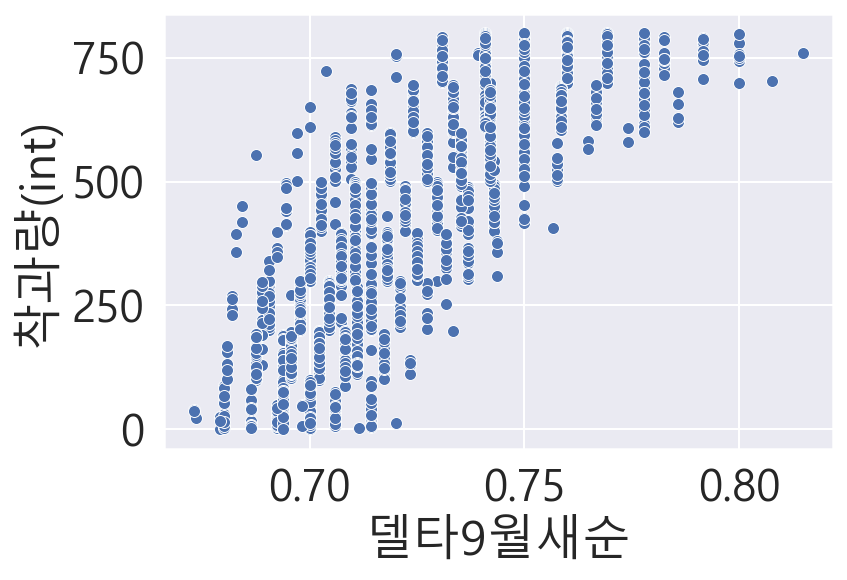

In [99]:
train['델타9월새순']=train['2022-09-30 새순']/train['2022-09-01 새순']
sns.scatterplot(data=train, x='델타9월새순',y='착과량(int)')

<AxesSubplot:xlabel='2022-09-01 새순', ylabel='착과량(int)'>

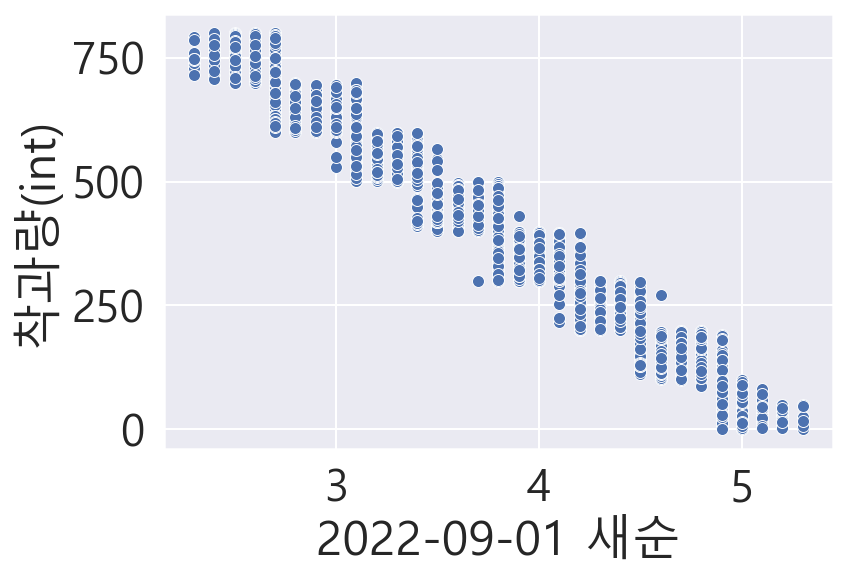

In [102]:
sns.scatterplot(data=train, x='2022-09-01 새순',y='착과량(int)')

<AxesSubplot:xlabel='9월새순평균', ylabel='착과량(int)'>

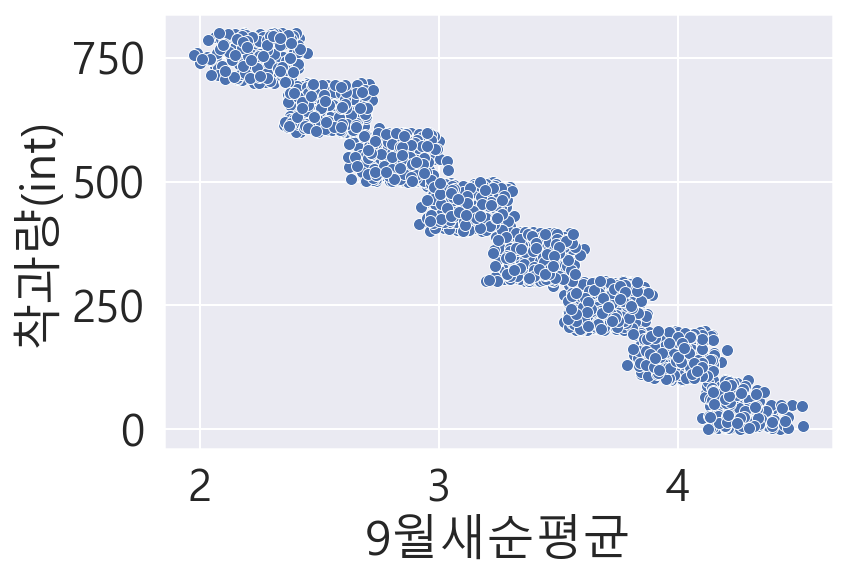

In [98]:
sns.scatterplot(data=train, x='9월새순평균',y='착과량(int)')

<AxesSubplot:xlabel='10월새순평균', ylabel='착과량(int)'>

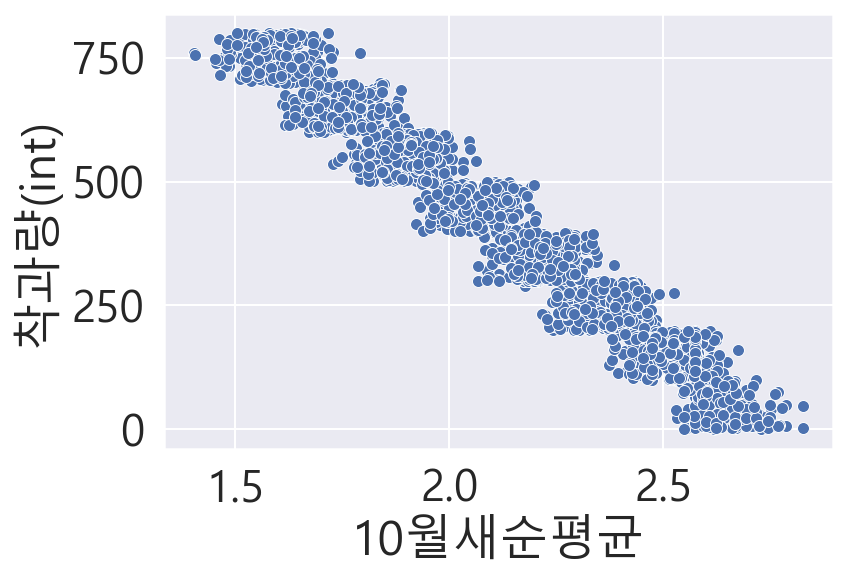

In [100]:
sns.scatterplot(data=train, x='10월새순평균',y='착과량(int)')

<AxesSubplot:xlabel='11월새순평균', ylabel='착과량(int)'>

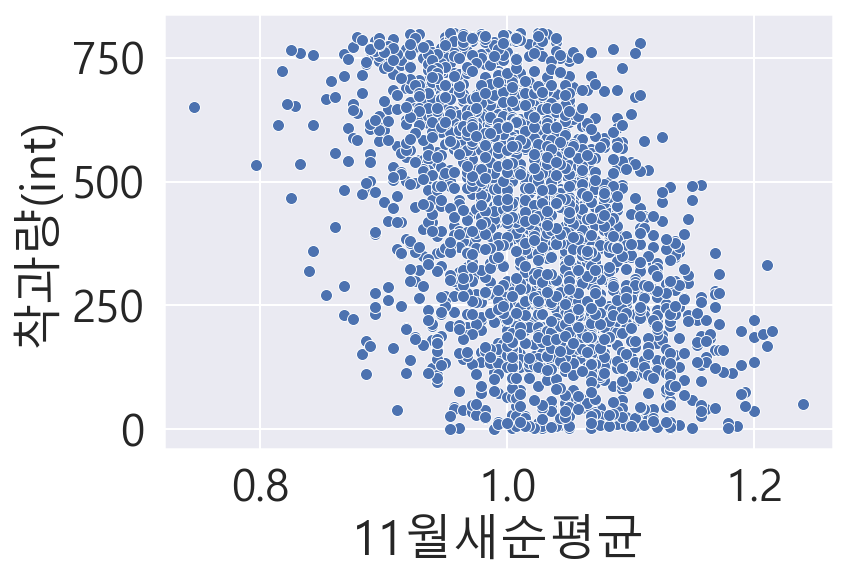

In [101]:
sns.scatterplot(data=train, x='11월새순평균',y='착과량(int)')

In [105]:
from sklearn.model_selection import train_test_split
X = train[['9월새순평균']]
y = train['착과량(int)']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

train_X = train[['9월새순평균']]
train_y = train['착과량(int)']
test_X = test[['9월새순평균']]

## DecisionTreeRegressor

In [82]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth =4)
dtr.fit(X_train,y_train)
pred_dtr = dtr.predict(X_test)

dtr_train_score = dtr.score(X_train, y_train)
dtr_test_score = dtr.score(X_test, y_test)
print(f'max_depth = {i}, dtr_train_score : {round(dtr_train_score,3)}, dtr_test_score : {round(dtr_test_score,3)}, delta : {round(dtr_train_score-dtr_test_score,3)}')
    
dtr = DecisionTreeRegressor(max_depth =5)
dtr.fit(train_X,train_y)
pred_dtr = dtr.predict(test_X)
aaa['착과량(int)'] = pred_dtr
print(aaa)
#aaa.to_csv('data/submission.csv', index=False)

max_depth = 2022-11-28 새순, dtr_train_score : 0.97, dtr_test_score : 0.962, delta : 0.008
             ID    착과량(int)
0     TEST_0000  250.109890
1     TEST_0001  751.017699
2     TEST_0002  150.678414
3     TEST_0003  448.735000
4     TEST_0004  681.431034
...         ...         ...
2203  TEST_2203  758.342466
2204  TEST_2204  345.415663
2205  TEST_2205  361.800000
2206  TEST_2206  250.109890
2207  TEST_2207  108.583333

[2208 rows x 2 columns]


max_depth = 3,  model_train_score : 0.983, model_test_score : 0.982, delta : 0.001

## LinearRegression

In [83]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)
print(f'lr_train_score : {round(lr_train_score,3)}, lr_test_score : {round(lr_test_score,3)}, delta : {round(lr_train_score-lr_test_score,3)}')

lr.fit(train_X,train_y)
pred_lr = lr.predict(test_X)
aaa['착과량(int)'] = pred_lr
print(aaa)
#aaa.to_csv('data/allcolums_lr_submission.csv', index=False)

lr_train_score : 0.963, lr_test_score : 0.961, delta : 0.001
             ID    착과량(int)
0     TEST_0000  277.202419
1     TEST_0001  752.266834
2     TEST_0002  145.681006
3     TEST_0003  435.935159
4     TEST_0004  693.308959
...         ...         ...
2203  TEST_2203  776.076745
2204  TEST_2204  310.082772
2205  TEST_2205  381.512505
2206  TEST_2206  214.843128
2207  TEST_2207   95.793573

[2208 rows x 2 columns]


## GradientBoostingRegressor

In [127]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
gbr = GBR(learning_rate=0.042, loss='squared_error' , max_depth=4, min_samples_leaf=4, min_samples_split=28, n_estimators=110)
gbr.fit(X_train, y_train)

gbr_train_score = gbr.score(X_train, y_train)
gbr_test_score = gbr.score(X_test, y_test)
print(f'gbr_train_score : {round(gbr_train_score,3)}, gbr_test_score : {round(gbr_test_score,3)}, delta : {round(gbr_train_score-gbr_test_score,3)}')



gbr_train_score : 0.979, gbr_test_score : 0.969, delta : 0.01


In [ ]:
gbr.fit(train_X,train_y)
pred_gbr = gbr.predict(test_X)
aaa['착과량(int)'] = pred_gbr
print(aaa)
#aaa.to_csv('data/allcolums_gbr_submission.csv', index=False)

In [104]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)
print(f'lasso_train_score : {round(lasso_train_score,3)}, lasso_test_score : {round(lasso_test_score,3)}, delta : {round(lasso_train_score-lasso_test_score,3)}')

lasso.fit(train_X,train_y)
pred_lasso = lasso.predict(test_X)
aaa['착과량(int)'] = pred_lasso
print(aaa)
#aaa.to_csv('data/allcolums_lasso_submission.csv', index=False)

lasso_train_score : 0.963, lasso_test_score : 0.961, delta : 0.001
             ID    착과량(int)
0     TEST_0000  278.153807
1     TEST_0001  749.715119
2     TEST_0002  147.602227
3     TEST_0003  435.716059
4     TEST_0004  691.191997
...         ...         ...
2203  TEST_2203  773.349457
2204  TEST_2204  310.791702
2205  TEST_2205  381.694716
2206  TEST_2206  216.254351
2207  TEST_2207   98.082662

[2208 rows x 2 columns]


c:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Anaconda3\lib\site-packages\joblib\memory.py", line 349, in __call_

finish


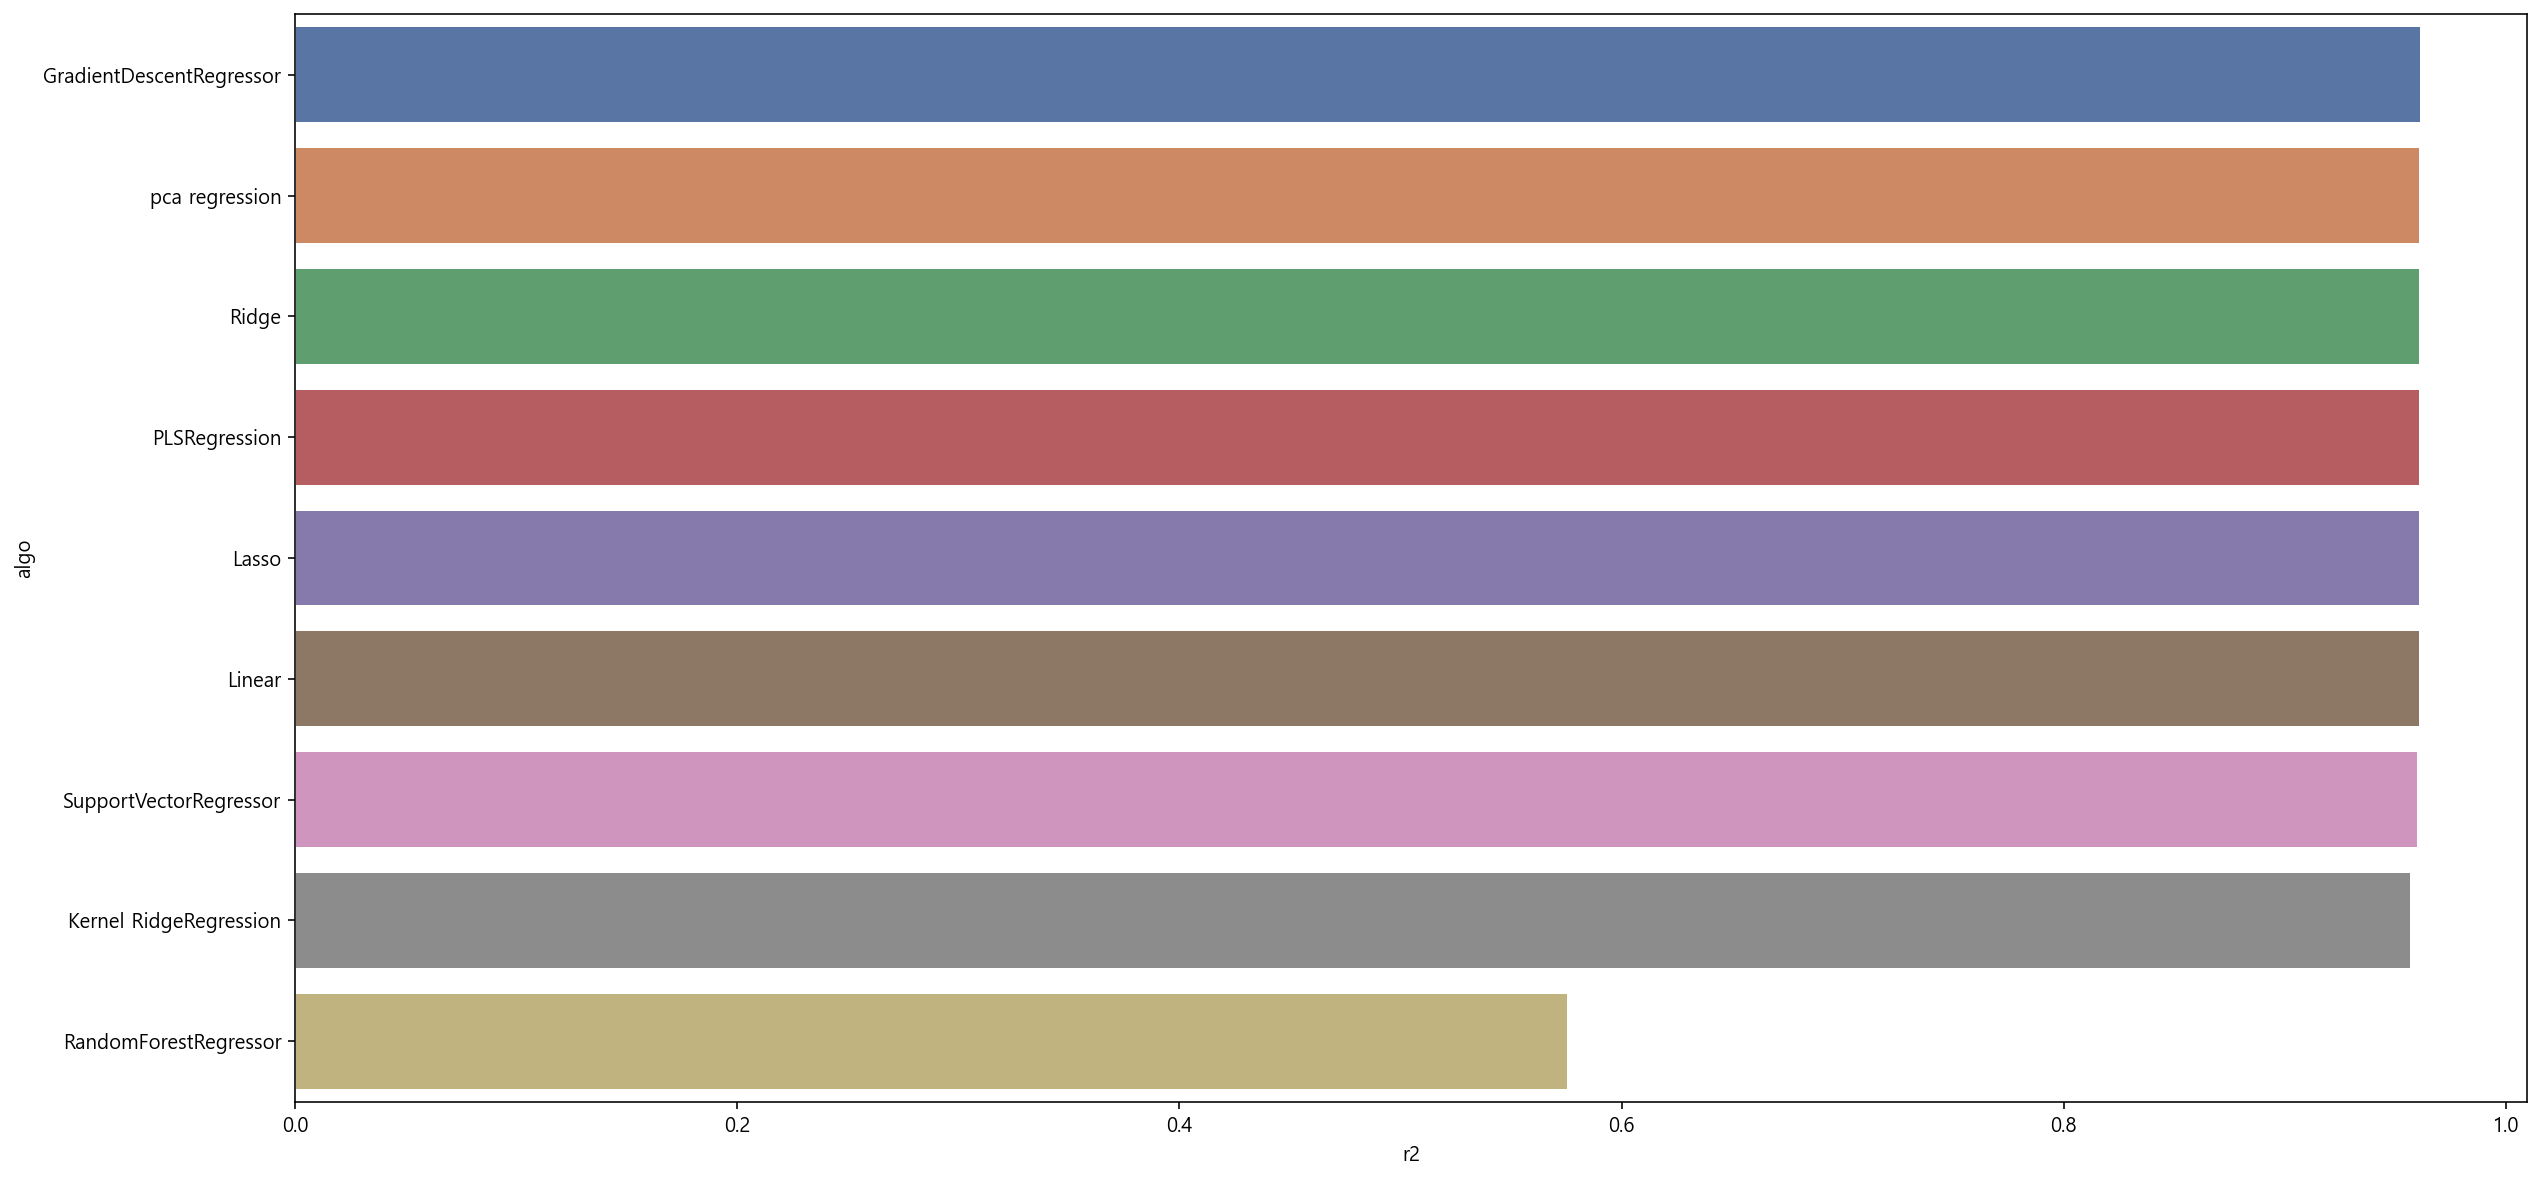

In [59]:
""" from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.cross_decomposition import PLSRegression as  PLS
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV


cv = ShuffleSplit(n_splits=5 , test_size=0.3, random_state=42)
pipe_linear = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', LinearRegression())])
pipe_lasso = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Lasso(random_state = 42))])
pipe_ridge = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Ridge(random_state = 42))])
pipe_pca = Pipeline([
                ('scl', StandardScaler()),
                ('pca', PCA()),
                 ('fit', Ridge(random_state = 42))])
pipe_pls = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', PLS())])
pipe_gbr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', GBR())])
pipe_rfr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', RFR())])
pipe_svr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', SVR())])

pipe_KR = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', KernelRidge())])
                 
                 
### 

grid_params_linear = [{
    "poly__degree" : np.arange(1,3), 
    "fit__fit_intercept" : [True, False], 
}]
grid_params_lasso = [{
    "poly__degree" : np.arange(1,3),
    "fit__tol" : np.logspace(-5,0,10) ,
    "fit__alpha" : np.logspace(-5,1,10) ,     
                     }]
grid_params_pca = [{
    "pca__n_components" : np.arange(2,8)
}]
grid_params_ridge = [{
    "poly__degree" : np.arange(1,3),
    "fit__alpha" : np.linspace(2,5,10) ,
    "fit__solver" : [ "cholesky","lsqr","sparse_cg"] ,
    "fit__tol" : np.logspace(-5,0,10) ,
                     }]
grid_params_pls = [{
    "fit__n_components" : np.arange(2,8)
}]
min_samples_split_range = [0.5, 0.7 , 0.9]

grid_params_gbr =[{
    "fit__max_features" : ["sqrt","log2"] ,
    "fit__loss" : ["ls","lad","huber","quantile"] , 
    "fit__max_depth" : [5,6,7,8] ,
    "fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_rfr =[{
    "fit__max_features" : ["sqrt","log2"] , 
    "fit__max_depth" : [5,6,7,8] ,
    "fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_svr =[{
    "fit__kernel" : ["rbf", "linear"] ,
    "fit__degree" : [2, 3, 5] , 
    "fit__gamma" : np.logspace(-5,1,10) ,
}]
grid_params_KR =[{
    "fit__kernel" : ["rbf","linear"] , 
    "fit__gamma" : np.logspace(-5,1,10) ,
}]
pipe = [
    pipe_linear , pipe_lasso ,  pipe_pca ,
    pipe_ridge , pipe_pls , pipe_gbr , 
    pipe_rfr , pipe_svr , pipe_KR 
]

params = [
    grid_params_linear , grid_params_lasso , grid_params_pca,
    grid_params_ridge , grid_params_pls , grid_params_gbr ,
    grid_params_rfr , grid_params_svr , grid_params_KR
]

jobs = 20

grid_dict = {
    0: 'Linear', 
    1: 'Lasso', 
    2: 'pca regression' , 
    3: 'Ridge' ,
    4: 'PLSRegression',
    5: "GradientDescentRegressor" ,
    6: "RandomForestRegressor" ,
    7: "SupportVectorRegressor" ,
    8: "Kernel RidgeRegression"
            }

model_mse = {}
model_r2 = {}
model_best_params = {}

for idx , (param , model) in enumerate(zip(params , pipe)) :
    search = GridSearchCV(model, param , scoring  = "neg_mean_squared_error" , 
                          cv=cv , n_jobs=jobs , verbose=-1 )
    search.fit(X_train , y_train)
    y_pred = search.predict(X_test)
    model_mse[grid_dict.get(idx)] = mse(y_test, y_pred)  
    model_r2[grid_dict.get(idx)] = r2(y_test, y_pred)  
    model_best_params[grid_dict.get(idx)] = search.best_params_
print("finish")


fig ,ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 2)
output = pd.DataFrame([model_r2.keys() , model_r2.values()], index = ["algo","r2"]).T
output.sort_values(["r2"], ascending= False ,inplace=True)
ax = sns.barplot(y="algo", x="r2", data=output)
plt.show() """